# CLASE 4.1 - NUMERICAL

## Lesson 1

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)


In [7]:
#importing data
data = pd.read_csv('unit4.csv') # this file is in files_for_lesson_and_activities folder
data.head()


,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [8]:
data.shape

(90569, 28)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [10]:
# Checking for null values
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls = nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


In [11]:
# Check the numerical variables
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


In [12]:
data.HOMEOWNR.value_counts()

H    49646
     21051
U    19872
Name: HOMEOWNR, dtype: int64

The INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.
In this exercise, we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.
We will use a similar method for the column TIMELAG .

<Axes: >

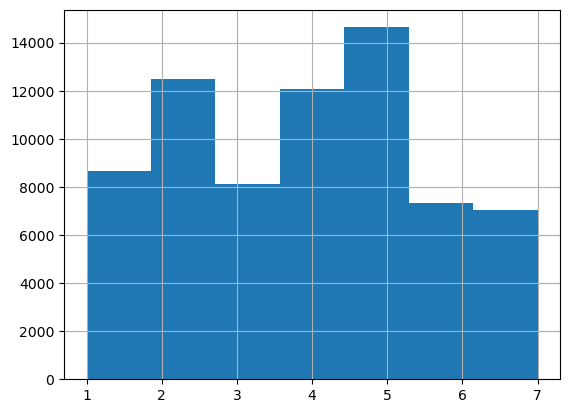

In [13]:
# working with INCOME column EDA + Data cleaning
data['INCOME'].hist(bins=7)


Looking at the histogram, we can see we need to replace the missing values first.
In the previous lessons, we talked about replacing null values with mean and median and some other constant value. In the later lessons, we will look at methods different than filling with constants (mean and median).

## Lesson 2

<Axes: >

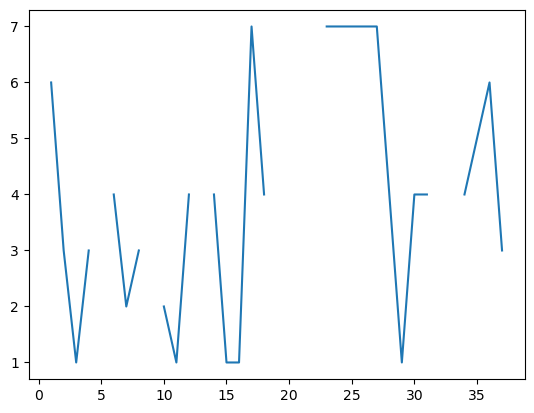

In [14]:
# How interpolation works
data['INCOME'][0:40].plot()  # To check how interpolation would fill the missing values

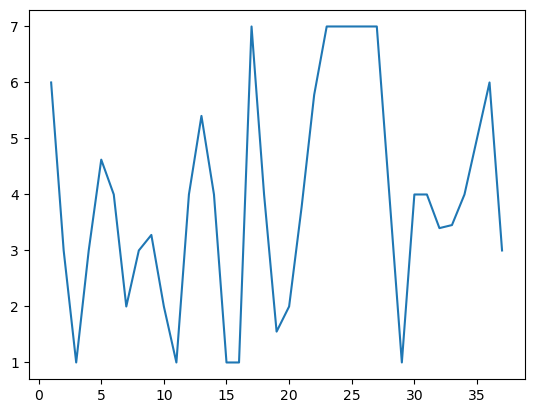

In [15]:
#new_income_data = data['INCOME'][0:40].interpolate(method='linear')
#new_income_data = data['INCOME'][0:40].interpolate(method='akima')  # Other methods that can be used
new_income_data = data['INCOME'][0:40].interpolate(method='polynomial', order=3)  # Other methods that can be used
new_income_data.plot()
plt.show()

<Axes: xlabel='INCOME', ylabel='Density'>

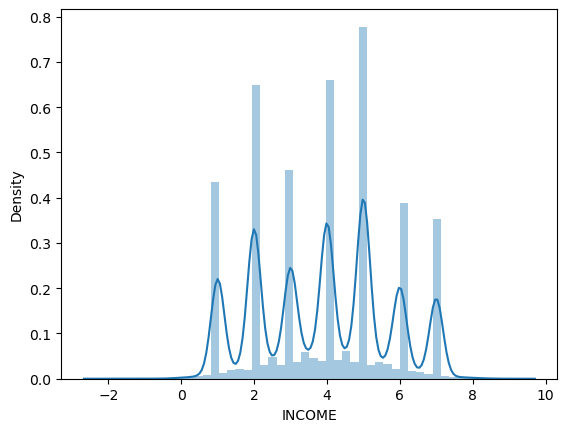

In [16]:
# Test what does the distribution look like after we have used interpolation method
points = data['INCOME'].interpolate(method='akima')
sns.distplot(points[1:])   # We are using the index __1:__ as first value was NaN

It is important to compare the results with other methods and then choose the best one.

<Axes: xlabel='INCOME', ylabel='Density'>

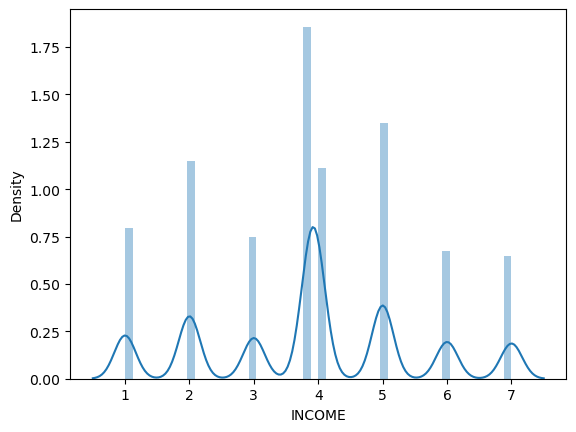

In [17]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.distplot(points2)

<Axes: xlabel='INCOME', ylabel='Density'>

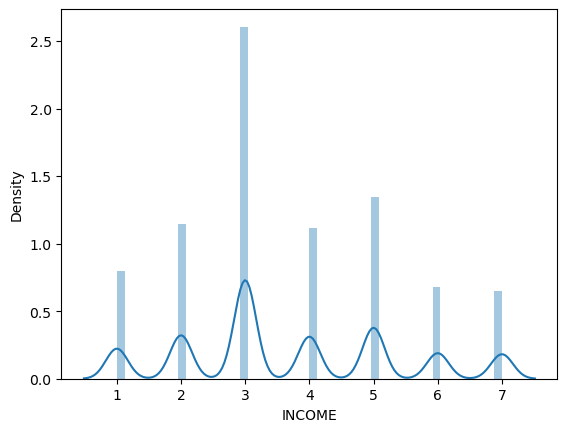

In [18]:
# Note that unlike "np.mean()" , "np.median()" doesn't work if there are any null values in the column
median = np.median(data['INCOME'].fillna(0))

points3 = data['INCOME'].fillna(median)
sns.distplot(points3)


In [19]:
# Finally choosing mean method
data['INCOME'] = data['INCOME'].fillna(np.mean(data['INCOME']))

## Lesson 3

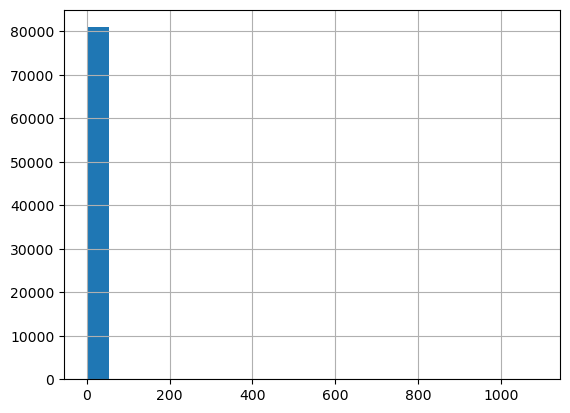

In [20]:
# Working with INCOME column EDA + Data cleaning
data['TIMELAG'].hist(bins=20)
plt.show()

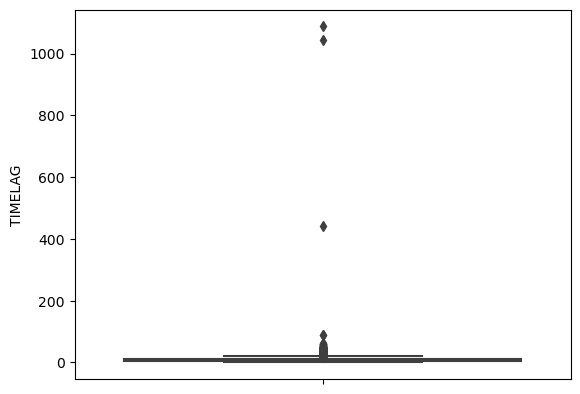

In [21]:
sns.boxplot(y=data['TIMELAG'])
plt.show()

Data in the Timelag column is highly skewed (positive skewness).
Removing outliers straight away might not be the best idea as it would remove a lot of data points from the data.
We will try some transformations.


In [22]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [23]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


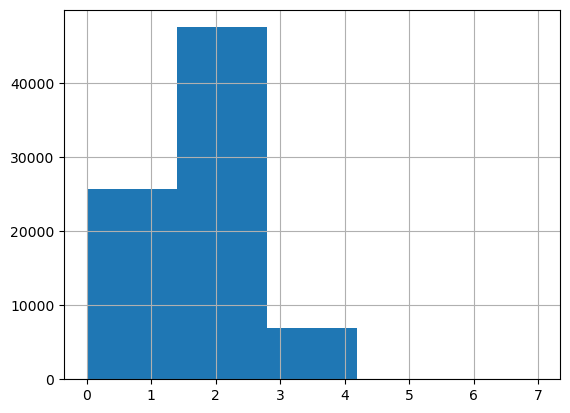

In [24]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist(bins=5)
plt.show()

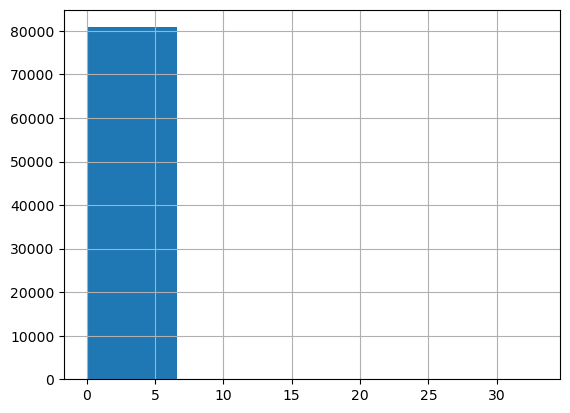

In [25]:
pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist(bins=5)
plt.show()


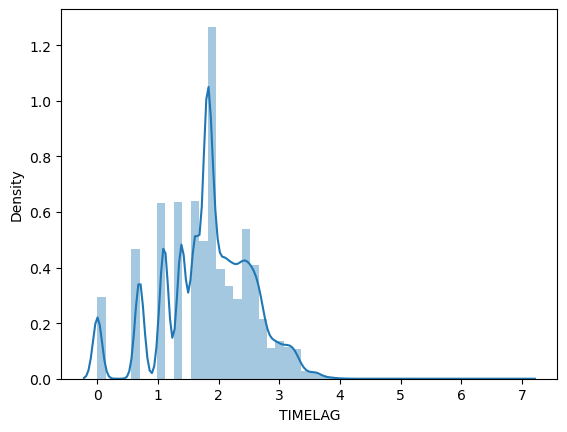

In [26]:
# Use log transformation to replace the values of the column now
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

## Lesson 4
Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.


In [27]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)

3.677021190805279


In [28]:
new_df = data[data['TIMELAG'] > upper_limit]
len(new_df)  # THis checks the number of points that will be removed

146

In [29]:
# Using filters
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

90423

In [30]:
## some other simple applications of filter

lst = [0,1,2,3,4,5,6,7,8,9,10]
list(filter(lambda x: x % 2 == 0, lst))


[0, 2, 4, 6, 8, 10]

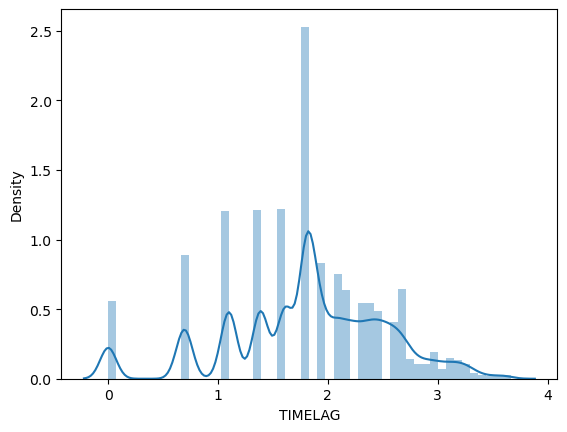

In [31]:
# Removing outliers
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()

# CLASE 4.2 - CATEGORICAL

## LESSON 1
Note this is a way to check the categorical variables (dtypes as object). If we want to perform any filtering operation, we will take the complete dataset and not just the categorical columns.

In [32]:
categoricals = data.select_dtypes(object)
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


In [33]:
# Deleting columns with over 80% empty values

data['PVASTATE'].value_counts()

     89041
P     1377
E        5
Name: PVASTATE, dtype: int64

In [34]:
data['RECP3'].value_counts()

     88594
X     1829
Name: RECP3, dtype: int64

In [35]:
data['VETERANS'].value_counts()

     80596
Y     9827
Name: VETERANS, dtype: int64

In [36]:
data = data.drop(columns=['PVASTATE', 'RECP3', 'VETERANS'], axis=1)

In [37]:
data['HOMEOWNR'].value_counts()

H    49563
     21021
U    19839
Name: HOMEOWNR, dtype: int64

As you can see, there is a lot of null values in the column but it is still not as many that the column might be removed. And if we filter out those values we will lose a lot of data. Another way of replacing those empty values is by replacing them with the maximum represented category but this introduces a bias. Another advanced methods include using machine learning to predict those values. Here in this case we will delete this column instead of inducing a bias.

In [38]:
data = data.drop(columns=['HOMEOWNR'], axis=1)

In [39]:
categoricals = data.select_dtypes(object)
categoricals.head()

,STATE,MDMAUD,GENDER,DOMAIN,RFA_2
0,IL,XXXX,F,T2,L4E
1,CA,XXXX,M,S1,L2G
2,NC,XXXX,M,R2,L4E
3,CA,XXXX,F,R2,L4E
4,FL,XXXX,F,S2,L2F


## LESSON 2
### Cleaning column GENDER

In [40]:
data['GENDER'].value_counts()

F    48595
M    37066
      2789
U     1634
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [41]:
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x

In [42]:
data['GENDER'] = list(map(clean_gender_col, data['GENDER']))

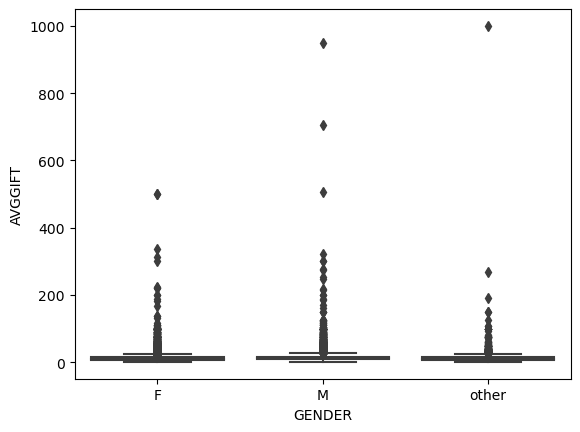

In [43]:
# Visually analyzing categorical data with Target variable
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

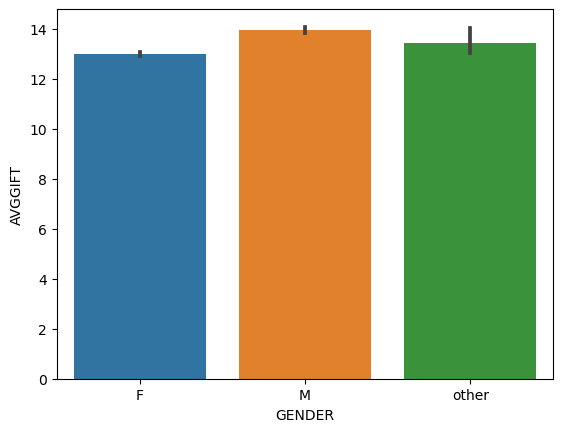

In [44]:
sns.barplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

## LESSON 3

### Dealing with a large number of categories
This code gives us the names of the states that should be put into category Other:

In [45]:
vals = pd.DataFrame(data['STATE'].value_counts())
vals = vals.reset_index()
vals.columns = ['state', 'counts']
group_states_df = vals[vals['counts']<2500]
group_states = list(group_states_df['state'])
group_states

['TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'OK',
 'KY',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'AK',
 'WY',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'MA',
 'NJ',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'RI',
 'VT',
 'VI',
 'WV',
 'GU',
 'DE',
 'AS',
 'DC']

In [46]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

In [47]:
data['STATE'] = list(map(clean_state, data['STATE']))

### Grouping data/bucketing data

In [48]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['IC2_'] = pd.cut(data['IC2'],4, labels=ic2_labels)
data # or: data['ic2_']

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_
0,IL,3712,XXXX,F,T2,3.878257,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low
1,CA,5202,XXXX,M,S1,6.000000,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High
2,NC,0,XXXX,M,R2,3.000000,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,F,R2,1.000000,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
4,FL,2001,XXXX,F,S2,3.000000,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,4803,XXXX,F,S2,6.000000,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,L4D,24,1.098612,3.375000,Low
90565,other,0,XXXX,M,C2,3.878257,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,L1G,1,1.826874,25.000000,Moderate
90566,TX,5001,XXXX,M,C1,7.000000,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,L1F,1,1.826874,20.000000,High
90567,MI,3801,XXXX,M,C3,3.878257,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,L3E,7,1.098612,8.285714,Low


In [49]:
# There is also pd.qcut which is based on quantiles.

pd.cut(data['IC2'],4)     # to check the bins

0          (-1.5, 375.0]
1        (750.0, 1125.0]
2          (-1.5, 375.0]
3         (375.0, 750.0]
4          (-1.5, 375.0]
              ...       
90564      (-1.5, 375.0]
90565     (375.0, 750.0]
90566    (750.0, 1125.0]
90567      (-1.5, 375.0]
90568     (375.0, 750.0]
Name: IC2, Length: 90423, dtype: category
Categories (4, interval[float64, right]): [(-1.5, 375.0] < (375.0, 750.0] < (750.0, 1125.0] < (1125.0, 1500.0]]

## LESSON 4
### Regular Expressions

In [50]:
import re

In [51]:
text = "That person wears marvelous trousers."

In [52]:
pattern = '[A-z]'
#pattern = 'That'
#pattern = '[That]'
#pattern = '[atsdhksdgs]'
re.findall(pattern, text)

['T',
 'h',
 'a',
 't',
 'p',
 'e',
 'r',
 's',
 'o',
 'n',
 'w',
 'e',
 'a',
 'r',
 's',
 'm',
 'a',
 'r',
 'v',
 'e',
 'l',
 'o',
 'u',
 's',
 't',
 'r',
 'o',
 'u',
 's',
 'e',
 'r',
 's']

In [53]:
text = "This is an A and B conversation, so C your way out of it."
pattern = '[^A-z]'
re.findall(pattern, text)

[' ', ' ', ' ', ' ', ' ', ' ', ',', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.']

### Quantifiers
- *: Matches previous character 0 or more times
- +: Matches previous character 1 or more times
- ?: Matches previous character 0 or 1 times (optional)
- {}: Matches previous characters however many times specified within:
- {n}: Exactly n times
- {n,}: At least n times
- {n,m}: Between n and m times

In [54]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = "c*t"
print(re.findall(pattern, text))

['t', 't', 't', 'ct', 't', 't', 't', 't', 'ct', 'ct']


In [55]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = 'c*a*t'
print(re.findall(pattern, text))

['t', 'caat', 't', 'ct', 't', 't', 't', 'cat', 'ct', 'ct']


In [56]:
text = "The complicit caaaat ct interacted with the other cats exactly as we expected."
pattern = "a+"
print(re.findall(pattern, text))
# Returns matches where the previous character appears 1 or more times

['aaaa', 'a', 'a', 'a', 'a']


In [57]:
text = "Is the correct spelling color or colour?"
pattern = "colou?r"
print(re.findall(pattern, text))

['color', 'colour']


In [58]:
text = "We can match the following: aaaawwww, aww, awww, awwww, awwwww"
pattern = "aw{3}"
print(re.findall(pattern, text))

['awww', 'awww', 'awww', 'awww']


In [59]:
pattern = "aw{1,}"
print(re.findall(pattern, text))

['awwww', 'aww', 'awww', 'awwww', 'awwwww']


In [60]:
text = "Let's see how we can match the following: aaw, aaww, aawww, awwww, awwwww"
pattern = "a{2,}w{2,}"
print(re.findall(pattern, text))

['aaww', 'aawww']


# LESSON 4.3 Feature Methods & Advanced Regular Expressions

## Learning objectives: 

- Use advanced regular expressions
- Explain the difference between feature engineering, feature extraction, and feature selection methods
- Conduct feature extraction to get more relevant features for modeling data
- Revisit some feature elimination techniques including correlations, heat maps, chi square tests

## Lesson 1: Conceptos Clave
- REGEX
- Usando cuantificadores
- Qué es un metacaracter?

In [61]:
import re
text = "That person wears marvelous trousers."
pattern = 'er'
# pattern = '[er]'
re.findall(pattern, text)

['er', 'er']

In [62]:
text = "Is it spelled gray or grey?"
# text = "Is it spelled gry or grey?"
pattern = 'gr[ae]y'
re.findall(pattern, text)

['gray', 'grey']

In [63]:
text = '''TKerraPower, A nuclear-energy company founded by Bill Gates,
        is unlikely to follow through on building a demonstration reactor in China,
        due largely to the Trump administration�s crackdown on the country'''

pattern = '[A-Z][a-z]*'
# pattern = '[A-z]+'
# pattern = '[A-Z][a-z]+'
print(re.findall(pattern, text))

['T', 'Kerra', 'Power', 'A', 'Bill', 'Gates', 'China', 'Trump']


### Metacaracteres

- \d: Coincide con cualquier dígito (0-9).
- \D: Coincide con cualquier carácter que no sea un dígito.
- \w: Coincide con cualquier carácter alfanumérico (letras mayúsculas y minúsculas, dígitos y guión bajo).
- \W: Coincide con cualquier carácter que no sea alfanumérico.
- \s: Coincide con cualquier carácter de espacio en blanco (espacio, tabulación, salto de línea, retorno de carro, etc.).
- \S: Coincide con cualquier carácter que no sea un espacio en blanco.
- \b: Coincide con un límite de palabra (word boundary).
- \B: Coincide con cualquier posición que no sea un límite de palabra.
- .: Coincide con cualquier carácter, excepto el salto de línea.
- \: Se utiliza para escapar caracteres especiales y tratarlos como caracteres literales. Por ejemplo, \. coincide con un punto literal.

# Quantifiers

- *: El asterisco indica que el elemento anterior puede aparecer cero o más veces. Por ejemplo, el patrón a* coincidiría con una cadena que contenga cero o más "a"s consecutivas, como "aa", "aaaa", o incluso una cadena vacía.
- +: El signo de más indica que el elemento anterior debe aparecer una o más veces. Por ejemplo, el patrón a+ coincidiría con una cadena que contenga una o más "a"s consecutivas, como "a", "aa", "aaaa", pero no coincidiría con una cadena vacía.
- ?: El signo de interrogación indica que el elemento anterior es opcional, es decir, puede aparecer cero o una vez. Por ejemplo, el patrón colou?r coincidiría tanto con "color" como con "colour".
- {n}: Las llaves se utilizan para especificar un número exacto de ocurrencias de un elemento. Por ejemplo, el patrón a{3} coincidiría con una cadena que contenga exactamente tres "a"s consecutivas, como "aaa".
- {n,}: Las llaves con una coma después del número especifican un mínimo de ocurrencias. Por ejemplo, el patrón a{2,} coincidiría con una cadena que contenga al menos dos "a"s consecutivas, como "aa", "aaa", "aaaa", y así sucesivamente.
- {n,m}: Las llaves con un rango separado por coma especifican un número mínimo y máximo de ocurrencias. Por ejemplo, el patrón a{2,4} coincidiría con una cadena que contenga de 2 a 4 "a"s consecutivas, como "aa", "aaa", o "aaaa", pero no coincidiría con una cadena que contenga una sola "a" o más de cuatro "a"s consecutivas.

# Más en Regex


- Caracteres literales: Poder buscar caracteres específicos en un texto. Por ejemplo, la expresión regular a coincidirá con la letra "a" en una cadena.
- Conjuntos de caracteres: Utilizar corchetes [] para definir un conjunto de caracteres posibles. Por ejemplo, [aeiou] coincidirá con cualquier vocal en una cadena.
- Metacaracteres: Entender el significado especial de ciertos caracteres como . (cualquier carácter), \ (escape), ^ (inicio de línea), $ (fin de línea), entre otros.
- Grupos de captura: Usar paréntesis ( ) para agrupar partes de un patrón y capturarlos para su posterior uso. Por ejemplo, el patrón (ab)+ coincidirá con "ab", "abab", "ababab", etc.
- Caracteres de escape: Conocer cómo escapar caracteres especiales en regex utilizando la barra invertida \. Por ejemplo, \$ coincidirá con el carácter de signo de dólar literal en una cadena.
- Anchors: Utilizar los metacaracteres ^ y $ para anclar un patrón al inicio o al final de una línea, respectivamente.
- Cuantificadores avanzados: Utilizar cuantificadores más avanzados como *?, +?, ??, {n,m}? para hacer coincidencias no codiciosas o perezosas (lazy quantifiers).
- Clases de caracteres predefinidas: Utilizar atajos como \d (dígitos), \w (caracteres alfanuméricos), \s (espacios en blanco), entre otros, para definir conjuntos de caracteres comunes.
- Modificadores: Utilizar modificadores como i (insensible a mayúsculas y minúsculas) o g (global) para ajustar el comportamiento de una expresión regular.
- Retroreferencias: Hacer referencia a grupos de captura anteriores en el patrón utilizando \n, donde n es el número del grupo.

In [64]:
text = "If you tell the truth, you don't have to remember anything 100."

pattern = '\w'
pattern = '\w+'
# pattern = '\w*'
# pattern = '\w?'
pattern = '.'
print(re.findall(pattern, text))

['I', 'f', ' ', 'y', 'o', 'u', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', ' ', 't', 'r', 'u', 't', 'h', ',', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'n', "'", 't', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', '1', '0', '0', '.']


In [65]:
text = "If you tell the truth, you don't have to remember anything 100."
pattern = '\w{4}'
#pattern = '\w{4,}'
print(re.findall(pattern, text))

['tell', 'trut', 'have', 'reme', 'mber', 'anyt', 'hing']


In [66]:
text = """
Aeromexico 800 -237- 6639
Air Canada 888-247-2262
Air Canada Rouge 888-247-2262
Air Creebec 800-567-6567
Air Inuit 800-361-2965
Air North 800-661-0407
Air Tindi 888-545-6794"""
pattern = '\d+-\d+-\d+'
re.findall(pattern, text)

['888-247-2262',
 '888-247-2262',
 '800-567-6567',
 '800-361-2965',
 '800-661-0407',
 '888-545-6794']

## REGEX 101

- Coincidencia de palabras: Puedes utilizar \b\w+\b para encontrar todas las palabras en el texto. Esto coincidirá con cada secuencia de caracteres alfanuméricos contiguos. Puedes usar este método para extraer todas las palabras del texto.

- Coincidencia de direcciones de correo electrónico: Puedes utilizar [a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,} para buscar direcciones de correo electrónico en el texto. Este patrón busca una cadena de caracteres que tenga el formato típico de una dirección de correo electrónico.

- Coincidencia de números de teléfono: Puedes utilizar un patrón como \d{3}-\d{3}-\d{4} para buscar números de teléfono en el formato xxx-xxx-xxxx. Esto buscará una secuencia de tres dígitos, seguida de un guion, seguida de otras tres dígitos y otro guion, y finalmente cuatro dígitos más.

- Extracción de etiquetas HTML: Puedes utilizar <([^>]+)> para extraer todas las etiquetas HTML presentes en un texto. Este patrón buscará cualquier cadena encerrada entre símbolos de mayor que y menor que, lo que generalmente indica una etiqueta HTML.

- Coincidencia de fechas: Puedes utilizar un patrón como \d{2}/\d{2}/\d{4} para buscar fechas en el formato dd/mm/aaaa. Esto buscará una secuencia de dos dígitos, seguida de una barra diagonal, otra secuencia de dos dígitos, otra barra diagonal y finalmente una secuencia de cuatro dígitos.

- Extracción de URLs: Puedes utilizar un patrón como (https?|ftp)://[^\s/$.?#].[^\s]* para extraer URLs presentes en un texto. Este patrón buscará cualquier cadena que comience con "http://" o "https://" o "ftp://", seguida de cualquier combinación de caracteres que no sean espacios en blanco, "/", ".", "?", o "#".

# Lesson 2 - Conceptos Clave

## Introducción a la ingeniería de características (Feature Engineerirng)

La ingeniería de características es un proceso de transformación de los datos dados en una forma más fácil de interpretar. Todas las técnicas que hemos utilizado anteriormente, incluyendo técnicas de transformación de datos, codificación de variables categóricas, escalamiento de características numéricas, imputación de valores faltantes, limpieza de columnas categóricas, uso de expresiones regulares, uso de funciones de fecha y hora, y funciones de cadenas, son técnicas de ingeniería de características. La idea clave es manipular la información disponible para poder comprenderla mejor y mejorar el modelo.

Extracción de características/generación de características: Es el proceso de extraer información relevante de la información disponible. Por ejemplo, si se proporciona la fecha de nacimiento de los clientes en los datos, es posible que no estés interesado en cuándo nacieron, sino más bien en su edad. En ese caso, puedes usar funciones de fecha y hora para calcular la edad o extraer otra información relevante, como el año en que nacieron o el mes en que nacieron.

Selección de características: Este es el proceso de seleccionar las características/columnas en tus datos que son relevantes para el modelo. Por ejemplo, si se trata de un problema de predicción, estarás más interesado en aquellas variables que tienen un impacto en tu objetivo y no en otras columnas/características que no proporcionan ninguna información sobre el objetivo. Agregar variables que no aportan valor al modelo degrada el rendimiento tanto en términos de precisión como de eficiencia.
Algunos de los métodos de selección de características que hemos visto anteriormente incluyen:

- Comprobar valores nulos para eliminar una columna
- Verificar la relevancia de las columnas para descartar aquellas que no son significativas
- Usar mapas de calor para verificar la multicolinealidad en variables numéricas
- Pruebas de chi-cuadrado para variables categóricas

In [67]:
data.sample()

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_
35842,other,4401,XXXX,F,C3,4.0,452,464,3,2,166,156,207,207,5306,40,17,6,13,9702,L3E,7,2.079442,6.857143,Low


In [68]:
data.shape

(90423, 25)

In [69]:
# to check the number of clients for which this info is missing
len(data[data['DOB']==0])

22475

In [70]:
import re
def year(x):
    x = str(x)
    if len(x)<4:
        return np.nan
    else:
        pattern = '\d\d'
        yr = re.findall(pattern,x)[0]
        return int(yr)

In [71]:
data['year'] = list(map(year, data['DOB']))
data['year'] = 97 - data['year']

data['year'] = data['year'].fillna(np.mean(data['year']))

# Now we can drop the column DOB as we have extracted the information we need from this column
data = data.drop(['DOB'], axis=1)

In [72]:
data.head()

,STATE,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_,year
0,IL,XXXX,F,T2,3.878257,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low,60.000000
1,CA,XXXX,M,S1,6.000000,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High,45.000000
2,NC,XXXX,M,R2,3.000000,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low,59.512236
3,CA,XXXX,F,R2,1.000000,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate,69.000000
4,FL,XXXX,F,S2,3.000000,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low,77.000000


In [73]:
# Lesson 3: Multicolinealidad

# Lesson 3: Multicolinealidad

Through multivariate linear regression, we are trying to assess the influence of each of the predictor variables on the target variable. This influence/relationship is linear and is represented by a mathematical equation. The equation is given as: Y=β0+β1X1+β2X2+β3X3+β4X4+........+βnXn. Here, each variable is trying to explain some information about the nature of Y, how does Y change with each of the predictor variables. The change in Y with X is technically variation. When the predictor variables are all independent of each other, each variable explains some information on the change in Y. Multicollinearity arises when the predictor variables are highly correlated. Hence some predictors are redundant as they do not reveal any new information on the change in Y with a change in X.

The correlation matrix using the heat maps helps us understand the correlation between the independent variables. Using the sklearn.metrics module we calculate R square statistic. It measures the proportion of variance in the dependent variable that is explained by all of the independent variables.

For checking multicollinearity, we calculate R square k and VIF (variance inflation factor) for each of the k independent variables. We do this by regressing the k-th independent variable on all of the other independent variables. That is, we treat X k as the dependent variable and use the other independent variables to predict X k.

For eg. Y=β0+β1X1+β2X2+β3X3+β4X4

Build a model X1 vs. X2 X3 X4, find R^2, call it R1. Build a model X2 vs. X1 X3 X4, find R^2, call it R2. and so on and so forth

Interpreting R square k - If R2k equals zero, variable k is not correlated with any other independent variable. Usually, multicollinearity is a potential problem when R2k is greater than 0.75 and, a serious problem when R2k is greater than 0.9.

For each variable that we find individual R2, VIF = 1 / ( 1 - R2k ) (for each dependent variable k). It is used to assess multicollinearity.

Interpretation of the variance inflation factor: If VIFk = 1, variable k is not correlated with any other independent variable. Multicollinearity is a potential problem when VIFk is greater than 4 and, a serious problem when it is greater than 10.

## Effects of Multicollinearity:
It makes it harder to interpret the significance of variables in the regression model (we will talk about statistical significance/p-value later).
It might give good enough results due to over-fitting, but those will not be very reliable (we will talk about over-fitting and under-fitting in more detail later. Over-fitting for now, you can explain to the students as a more complicated model and not very generalized ie it might work on the data at hand very well but not so well on the unknown/out of the box data.
It is also important to note that it does not severely impact the model in terms of predicting power if the only prediction is the main goal of the analysis.

## Dealing with High Multicollinearity:

Centering/standardizing/normalizing variables may help reduce multicollinearity.
Removing one or more of the variables that are highly correlated with each other.

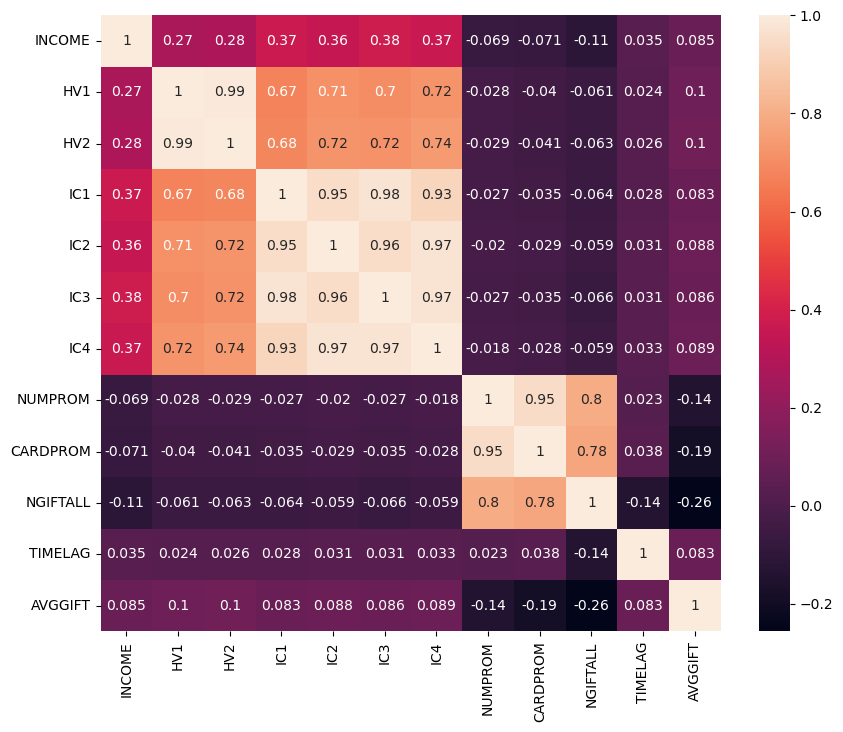

0.9047156254468065

In [74]:
## Activity 3
from sklearn.linear_model import LinearRegression
import seaborn as sns

data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


# sns.regplot( 'HV1', 'HV2', data=data_corr)

model = LinearRegression().fit(data_corr[['HV1']], data_corr[['HV2']])
model.score(data_corr[['HV1']], data_corr[['HV2']])

model = LinearRegression().fit(data_corr[['IC1']], data_corr[['IC2']])
model.score(data_corr[['IC1']], data_corr[['IC2']])

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# This is the code to show how to use the __variance_inflation_factor__ function
# We are using add_constant here as VIF method in python expects the addition of a constant terms in the X features. It uses OLS but does not add the constant itself.

vif = {}
data_corr = add_constant(data_corr)
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

# Code to use the variance_inflation_factor technique to remove highly correlated columns

flag = True
threshold = 50
data_corr = add_constant(data_corr)
while flag is True:
    print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

   const    INCOME   HV1   HV2   IC1   IC2   IC3   IC4  NUMPROM  CARDPROM  \
0    1.0  3.878257   479   635   307   318   349   378       74        27   
1    1.0  6.000000  5468  5218  1088  1096  1026  1037       32        12   
2    1.0  3.000000   497   546   251   292   292   340       63        26   
3    1.0  1.000000  1000  1263   386   388   396   423       66        27   
4    1.0  3.000000   576   594   240   250   293   321      113        43   

   NGIFTALL   TIMELAG    AVGGIFT  
0        31  1.386294   7.741935  
1         3  2.890372  15.666667  
2        27  2.484907   7.481481  
3        16  2.197225   6.812500  
4        37  2.639057   6.864865  
[24.006053568194837, 1.181752979130143, 85.70760930281574, 90.3965988190978, 49.742778029333444, 43.05559947386378, 86.20633853589145, 68.50055707398415, 11.539700975615466, 10.642486812897822, 3.1092145279371883, 1.0791329964025085, 1.1213674946491357]
   const    INCOME   HV1   IC1   IC2   IC3   IC4  NUMPROM  CARDPROM  NGIF

In [76]:
data_corr.columns

Index(['const', 'INCOME', 'HV1', 'IC1', 'IC2', 'IC4', 'NUMPROM', 'CARDPROM',
       'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [77]:
vif

{'const': 24.006053568194837,
 'INCOME': 1.181752979130143,
 'HV1': 85.70760930281574,
 'HV2': 90.3965988190978,
 'IC1': 49.742778029333444,
 'IC2': 43.05559947386378,
 'IC3': 86.20633853589145,
 'IC4': 68.50055707398415,
 'NUMPROM': 11.539700975615466,
 'CARDPROM': 10.642486812897822,
 'NGIFTALL': 3.1092145279371883,
 'TIMELAG': 1.0791329964025085,
 'AVGGIFT': 1.1213674946491357}

# Lesson 4.4 : Feature Selection, Data Processing, KNN Algorithm

In [78]:
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins = False)
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
DOMAIN,,,,,,,,,,,,,,
,156,594,281,134,248,129,61,169,95,33,98,90,48,34
C1,249,1837,924,283,688,328,113,421,229,113,210,219,108,61
C2,413,2412,996,436,915,382,205,640,277,152,432,317,162,79
C3,300,1615,604,298,558,199,155,407,166,54,317,228,106,38
R1,62,419,184,52,157,71,26,113,52,24,50,37,24,12
R2,782,4033,1532,776,1471,596,397,1060,480,190,742,535,286,114
R3,311,1484,441,280,485,178,165,380,142,53,319,200,93,34
S1,410,3621,1877,410,1228,694,198,751,438,192,368,344,207,108
S2,396,2628,1015,401,994,311,184,673,331,126,382,346,191,68


In [79]:
data.columns

Index(['STATE', 'MDMAUD', 'GENDER', 'DOMAIN', 'INCOME', 'HV1', 'HV2', 'HV3',
       'HV4', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'NUMPROM', 'CARDPROM',
       'CARDPM12', 'NUMPRM12', 'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG',
       'AVGGIFT', 'IC2_', 'year'],
      dtype='object')

In [80]:
from scipy.stats import chi2_contingency

data_crosstab = pd.crosstab(np.where(data['INCOME']>3,'HIGH_INCOME', 'LOW_INCOME'), data['GENDER'], margins = False)
chi2_contingency(data_crosstab, correction=False)


Chi2ContingencyResult(statistic=582.3945680160126, pvalue=3.4247305676404872e-127, dof=2, expected_freq=array([[32893.24143194, 25089.43074218,  3223.32782589],
       [15701.75856806, 11976.56925782,  1538.67217411]]))

# Leson 4.4 Key Concepts

In [81]:
from scipy.stats import chi2_contingency
chi2_contingency(data_crosstab, correction=False) # chi-square statistic, p value, degrees of freedom, expected frequencies matrix

Chi2ContingencyResult(statistic=582.3945680160126, pvalue=3.4247305676404872e-127, dof=2, expected_freq=array([[32893.24143194, 25089.43074218,  3223.32782589],
       [15701.75856806, 11976.56925782,  1538.67217411]]))

In [82]:
# We will use the data we got after using VIF step for feature selection
# we will use it for numerical variables

data_corr.head()
numerical = data_corr.drop(['AVGGIFT'], axis=1)

In [83]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical)
x_standardized = transformer.transform(numerical)
x_standardized

array([[ 0.00000000e+00,  7.60298513e-05, -6.16567912e-01, ...,
         1.00551587e+00,  2.52952694e+00, -6.04890984e-01],
       [ 0.00000000e+00,  1.29736830e+00,  4.71111783e+00, ...,
        -7.41790035e-01, -7.65380500e-01,  1.47576381e+00],
       [ 0.00000000e+00, -5.36914591e-01, -5.97345955e-01, ...,
         8.89028814e-01,  2.05882587e+00,  9.14866533e-01],
       ...,
       [ 0.00000000e+00,  1.90879593e+00,  6.64895885e-01, ...,
        -1.67368652e+00, -1.00073103e+00,  4.58188548e-03],
       [ 0.00000000e+00,  7.60298513e-05, -7.26560222e-01, ...,
        -5.08815914e-01, -2.94679437e-01, -1.00285394e+00],
       [ 0.00000000e+00,  6.85940670e-01, -1.26408010e-01, ...,
         1.58795118e+00,  3.47092906e+00, -4.39937025e-02]])

In [84]:
# Min-max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

array([[0.        , 0.47970951, 0.07983333, ..., 0.43333333, 0.12711864,
        0.37840072],
       [0.        , 0.83333333, 0.91133333, ..., 0.18333333, 0.00847458,
        0.78895131],
       [0.        , 0.33333333, 0.08283333, ..., 0.41666667, 0.11016949,
        0.67827619],
       ...,
       [0.        , 1.        , 0.27983333, ..., 0.05      , 0.        ,
        0.49866067],
       [0.        , 0.47970951, 0.06266667, ..., 0.21666667, 0.02542373,
        0.29987547],
       [0.        , 0.66666667, 0.15633333, ..., 0.51666667, 0.16101695,
        0.48907583]])

In [85]:
# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized

array([[1.31889633e-03, 5.11501896e-03, 6.31751341e-01, ...,
        3.56102008e-02, 4.08857861e-02, 1.82837854e-03],
       [1.73134347e-04, 1.03880608e-03, 9.46698611e-01, ...,
        2.07761217e-03, 5.19403042e-04, 5.00422628e-04],
       [1.39175889e-03, 4.17527668e-03, 6.91704171e-01, ...,
        3.61857313e-02, 3.75774902e-02, 3.45839093e-03],
       ...,
       [4.52282955e-04, 3.16598068e-03, 7.59383081e-01, ...,
        1.80913182e-03, 4.52282955e-04, 8.26264020e-04],
       [1.57992030e-03, 6.12733701e-03, 5.94050032e-01, ...,
        2.21188842e-02, 1.10594421e-02, 1.73571985e-03],
       [7.90772766e-04, 3.95386383e-03, 7.41744855e-01, ...,
        2.53047285e-02, 3.08401379e-02, 1.41687459e-03]])

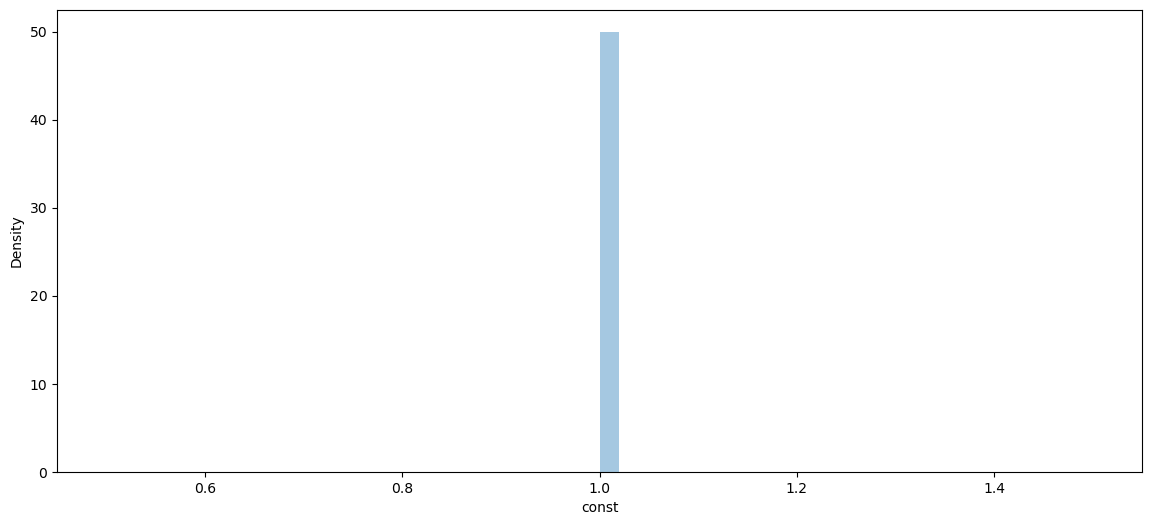

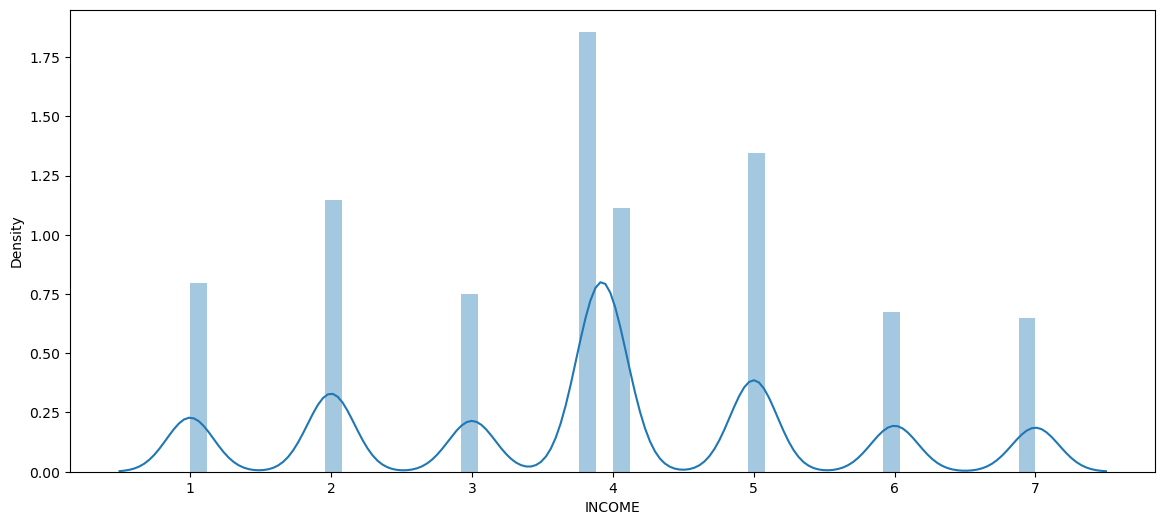

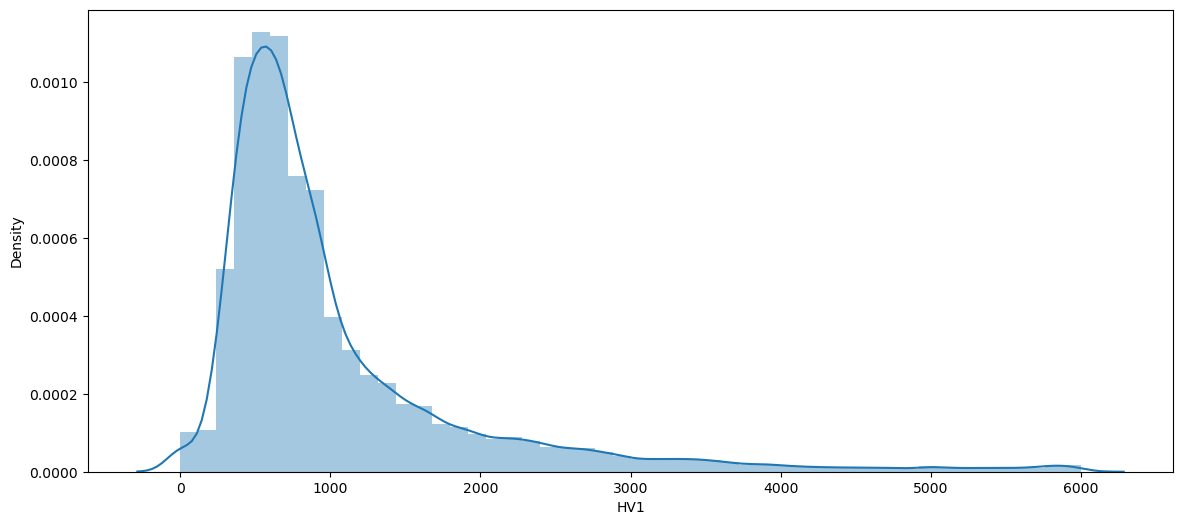

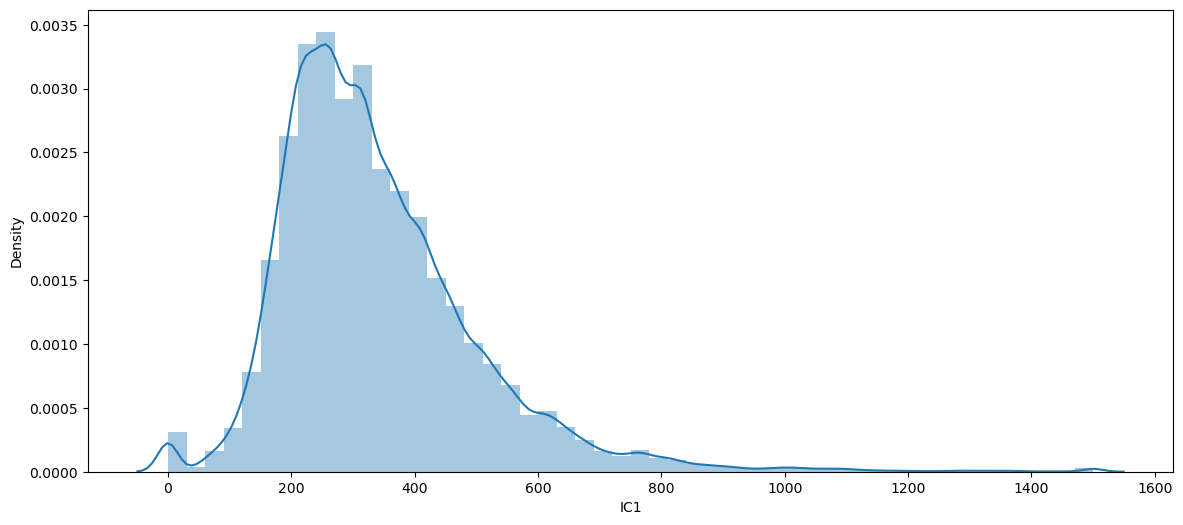

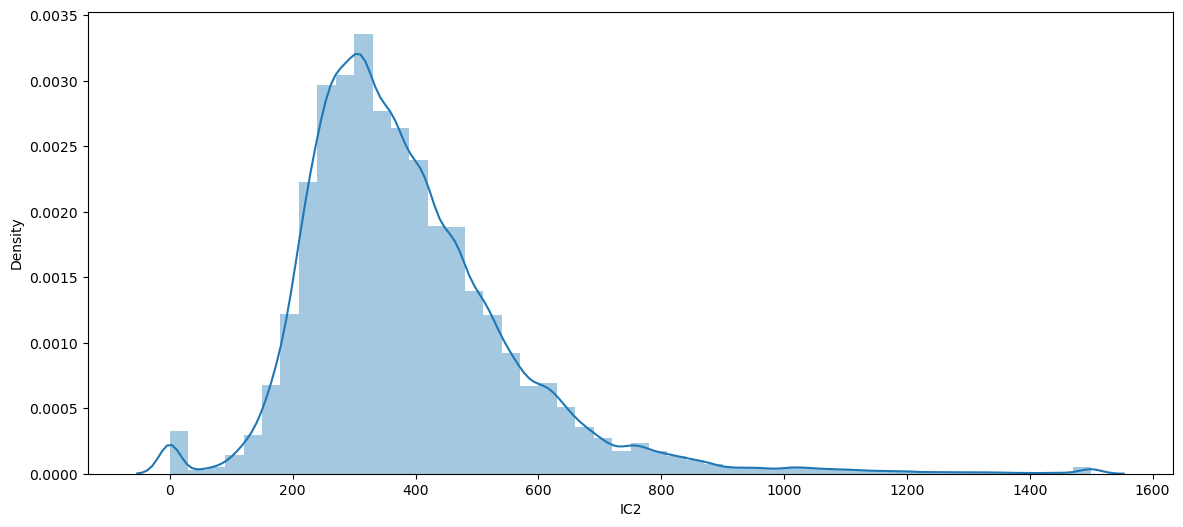

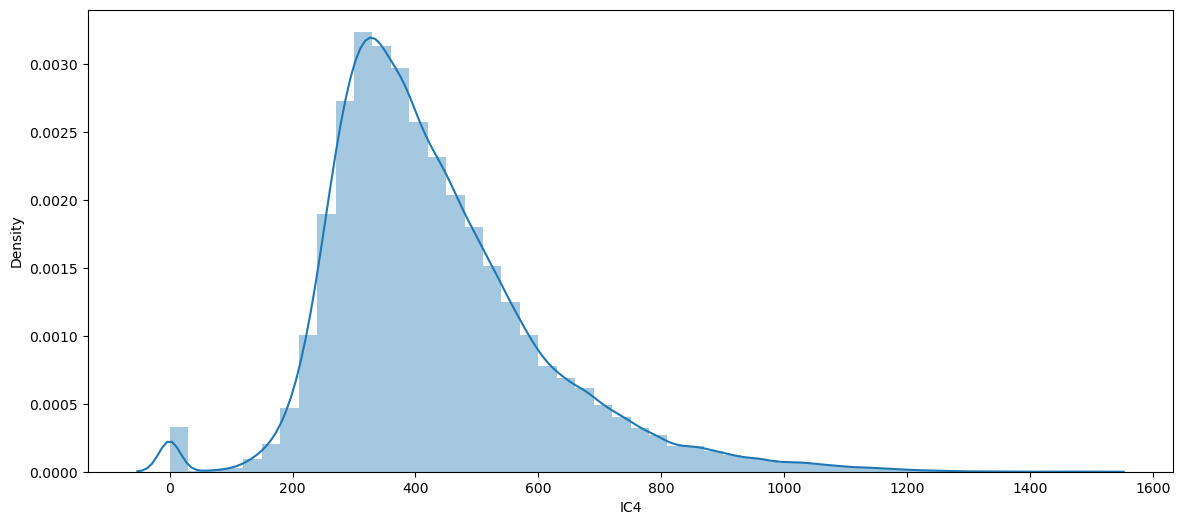

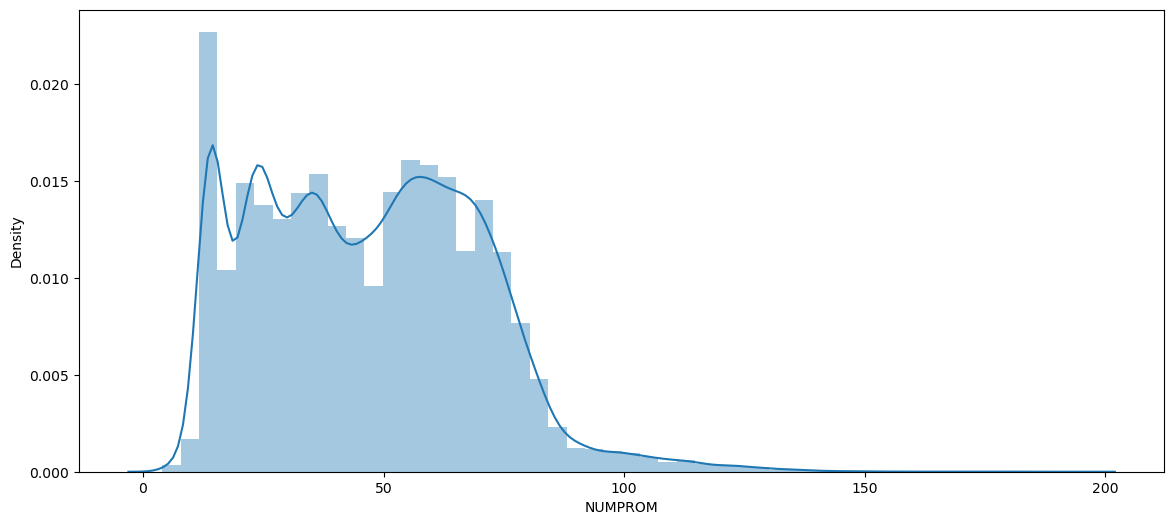

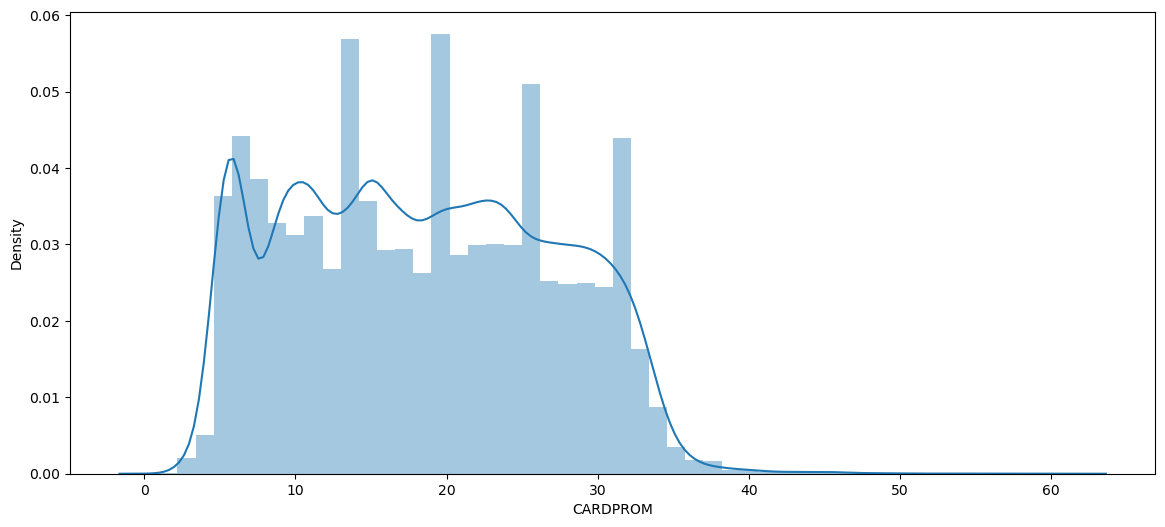

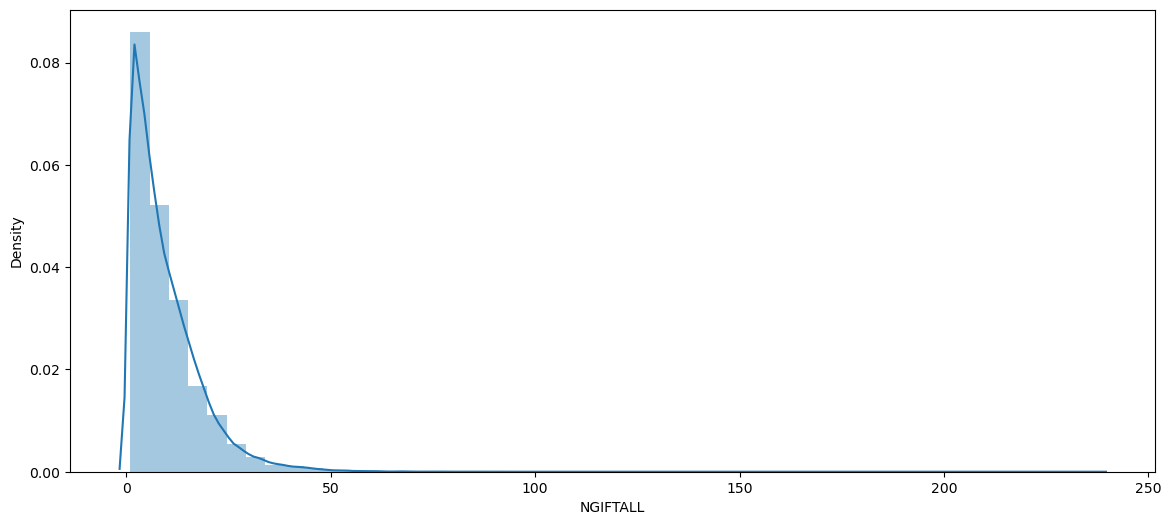

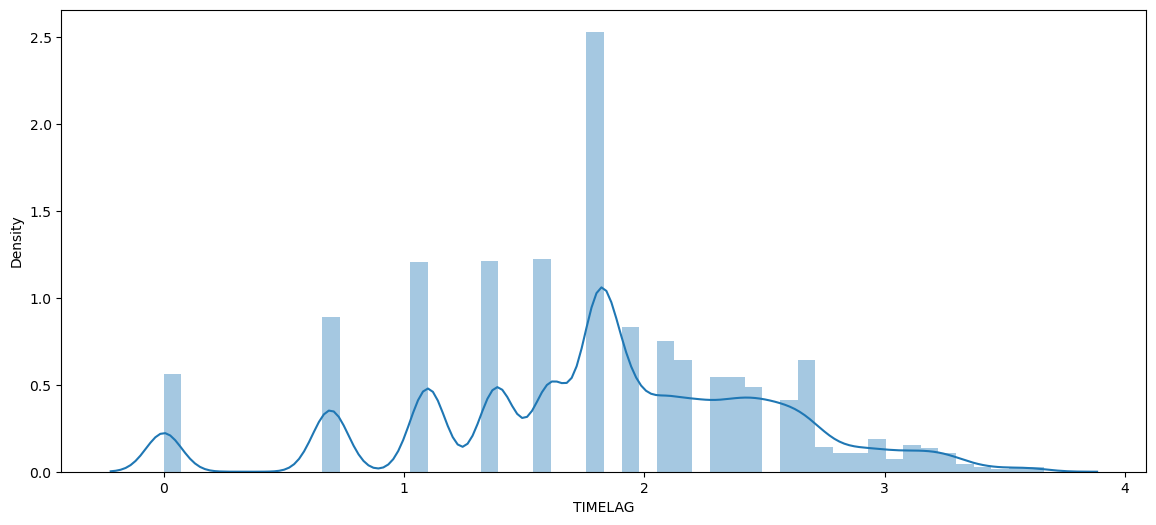

Transformation


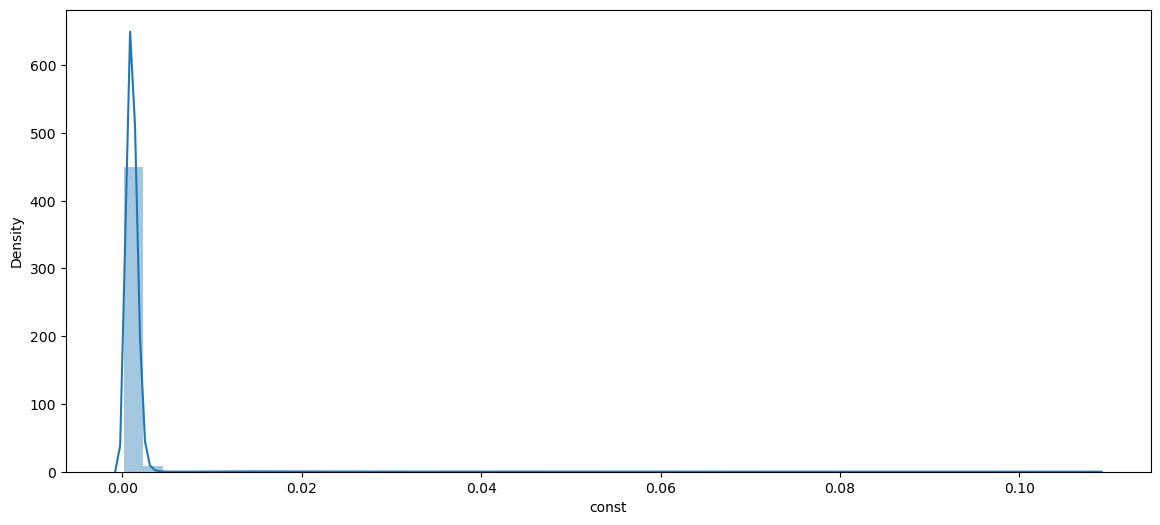

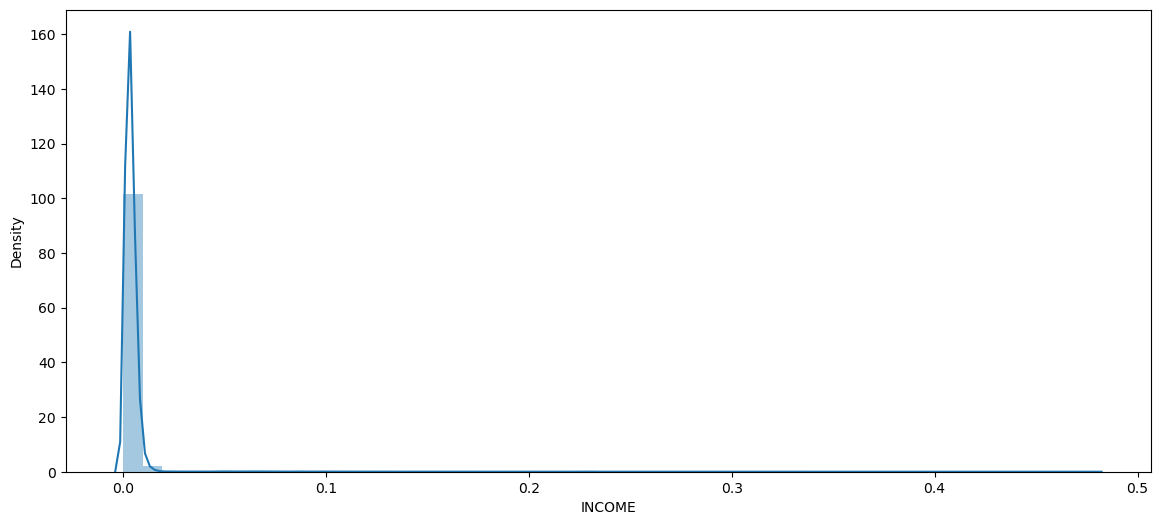

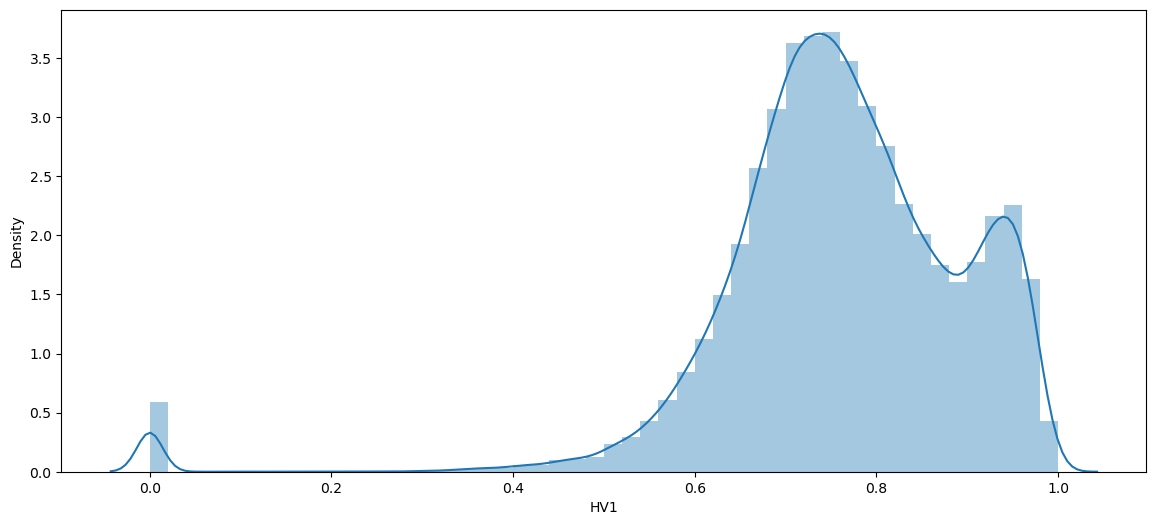

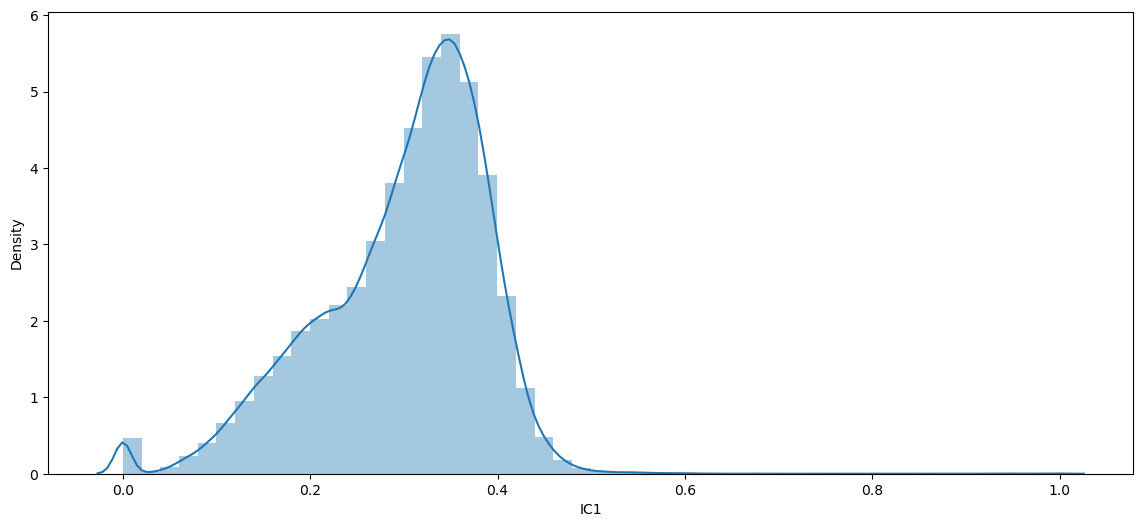

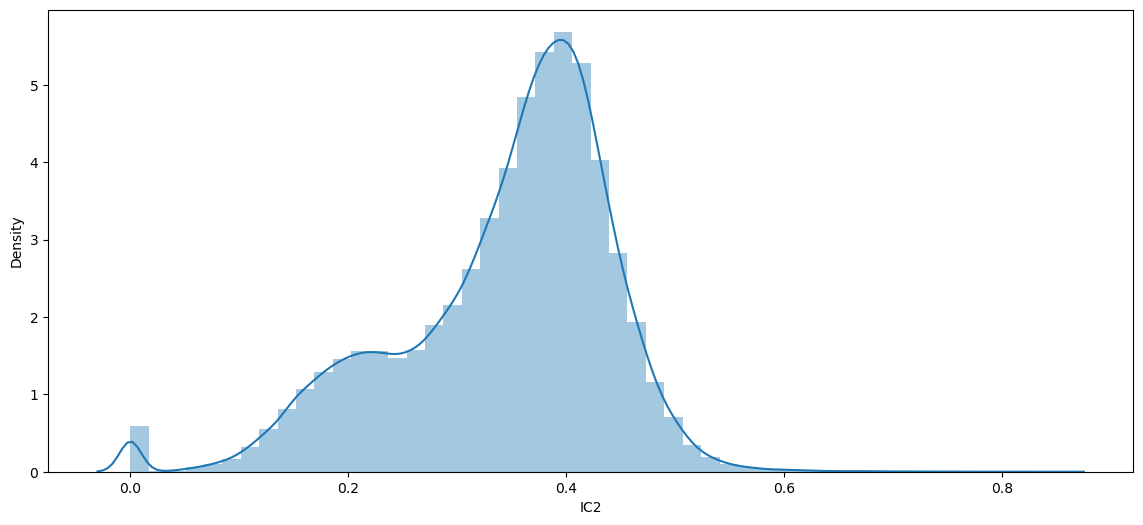

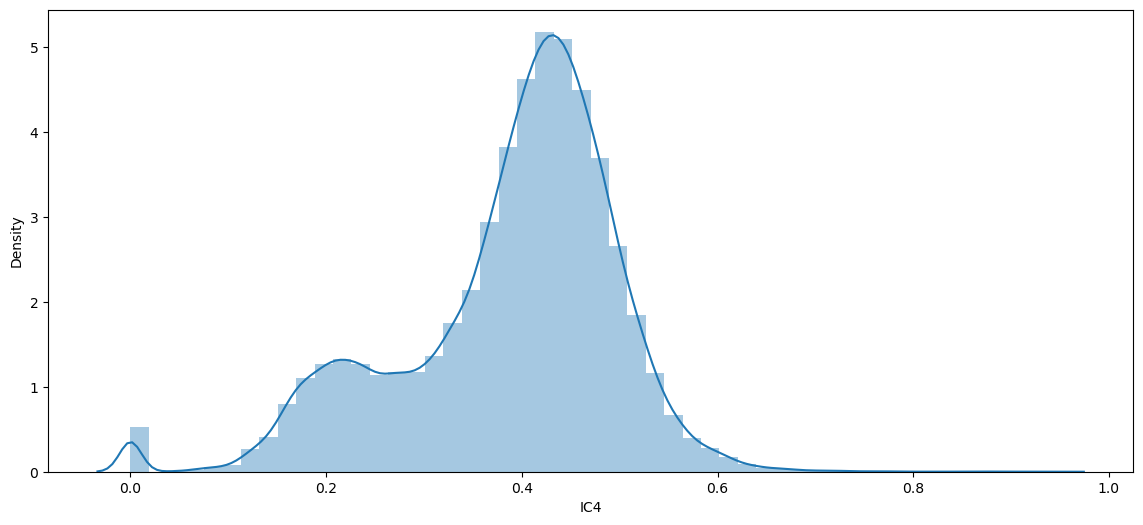

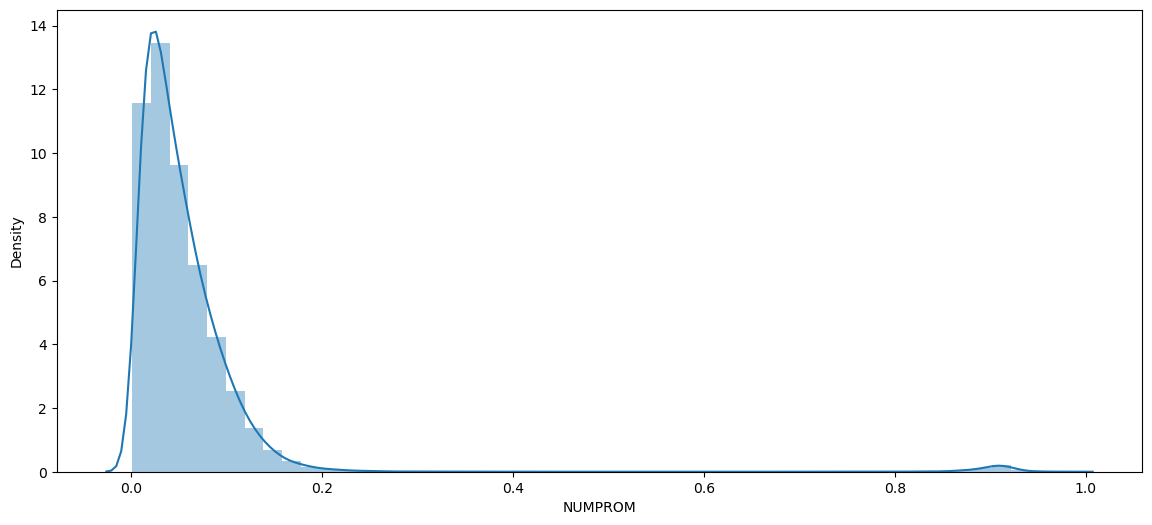

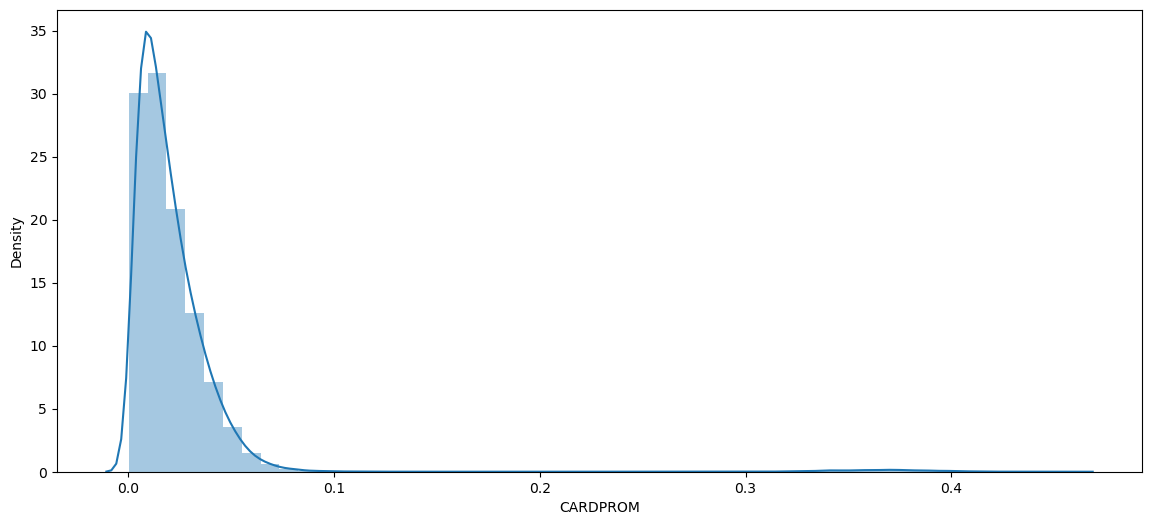

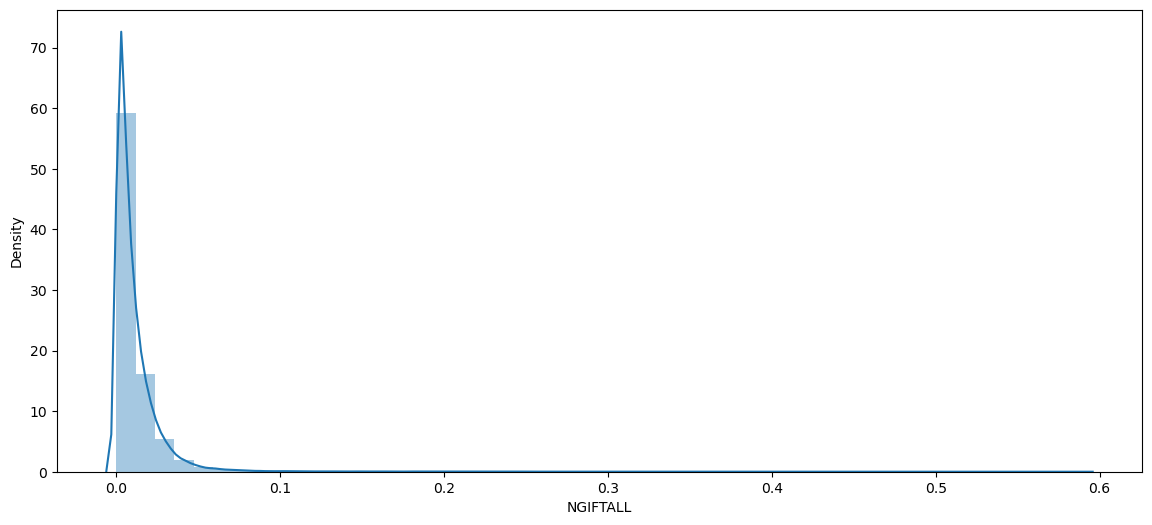

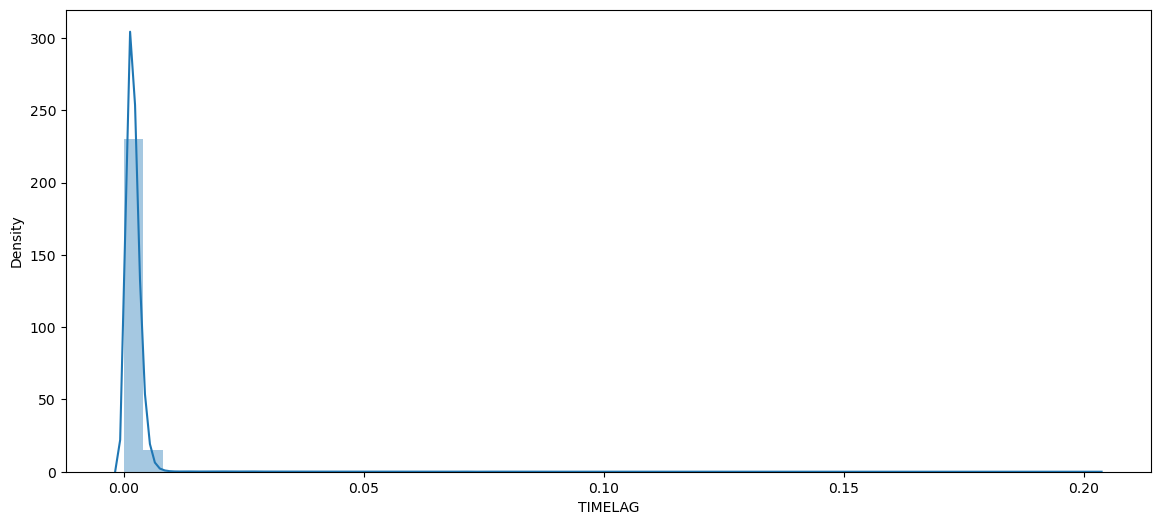

Transformation


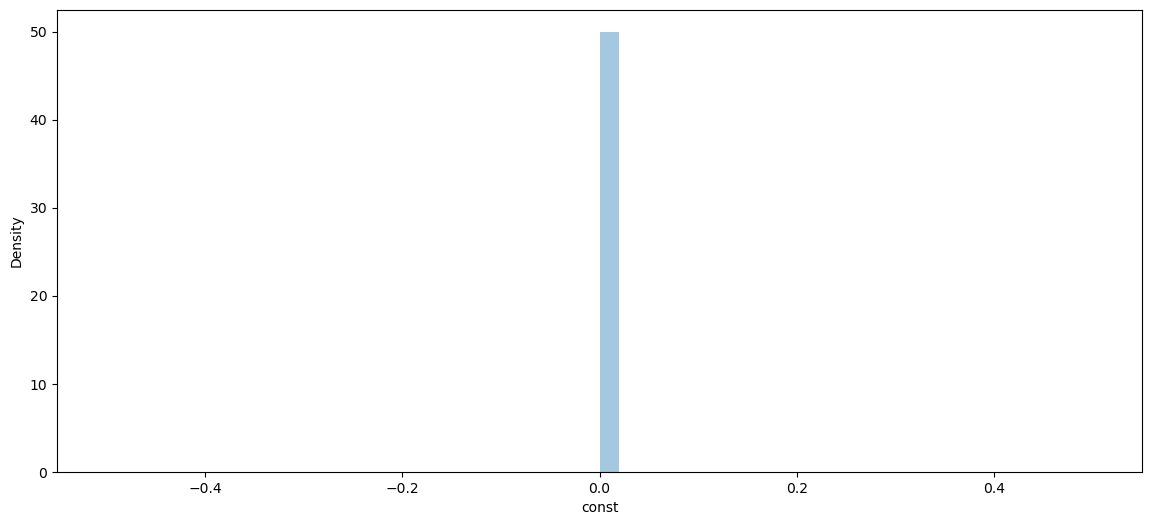

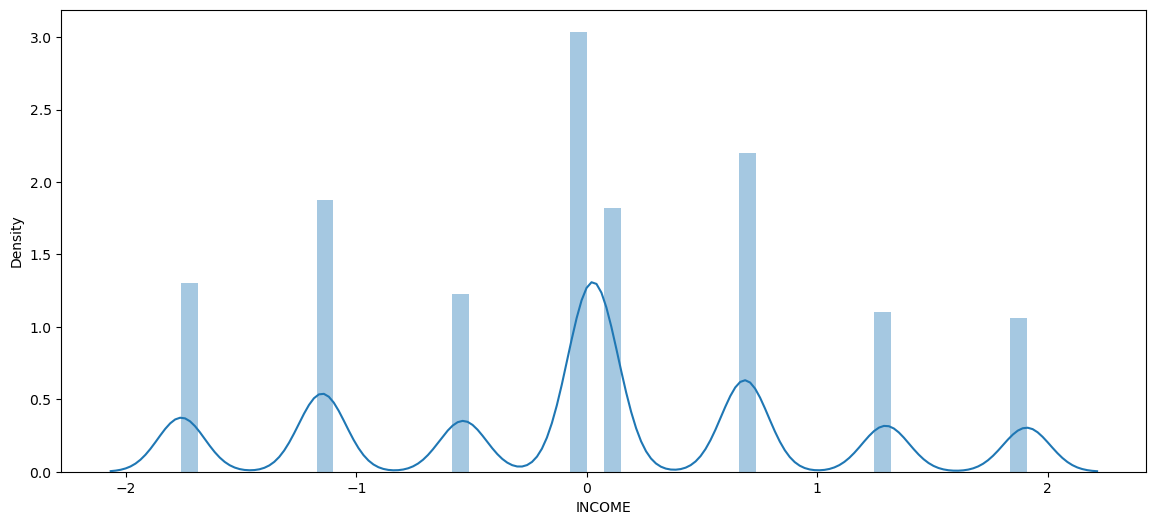

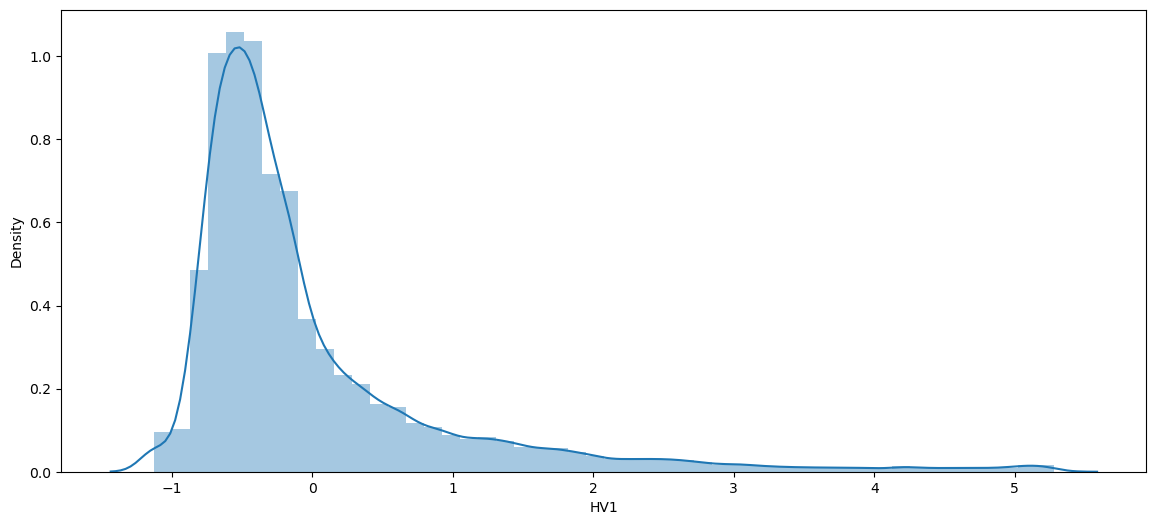

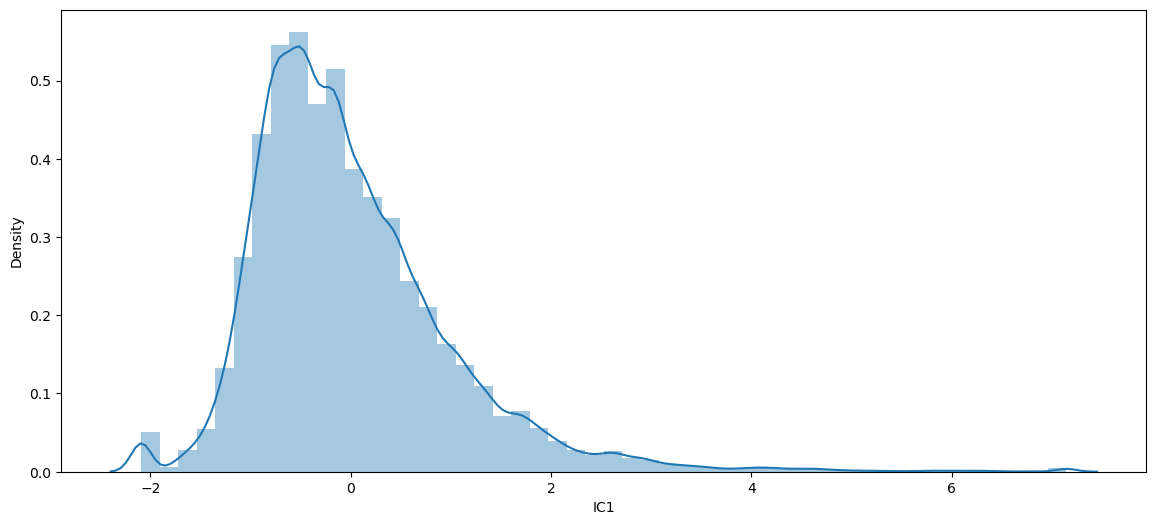

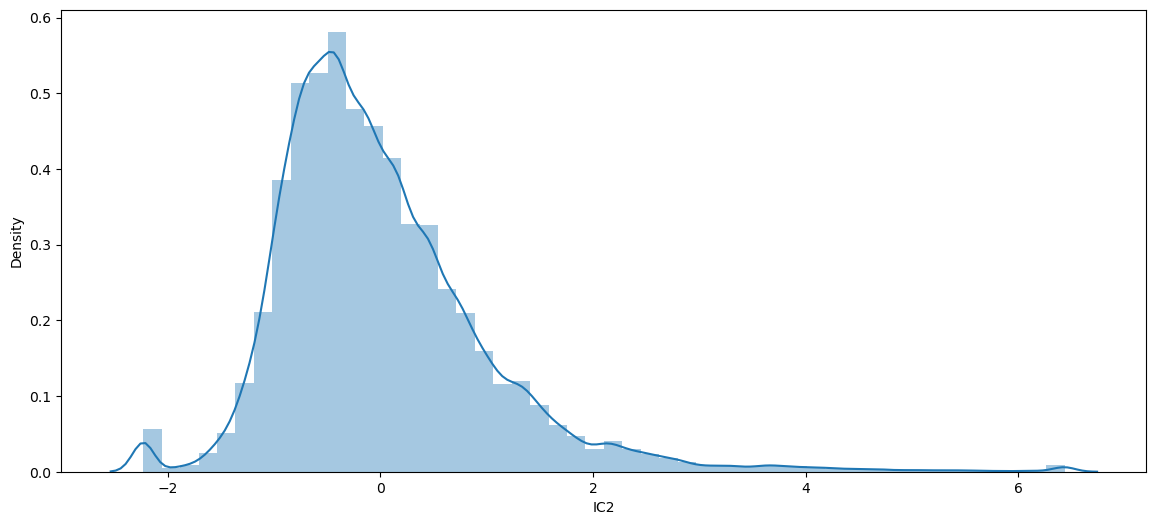

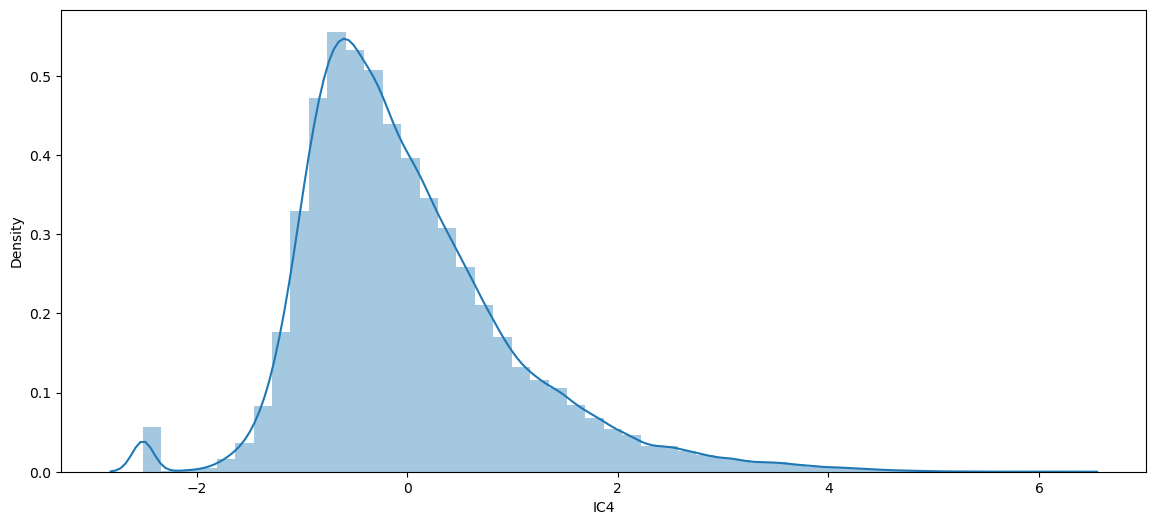

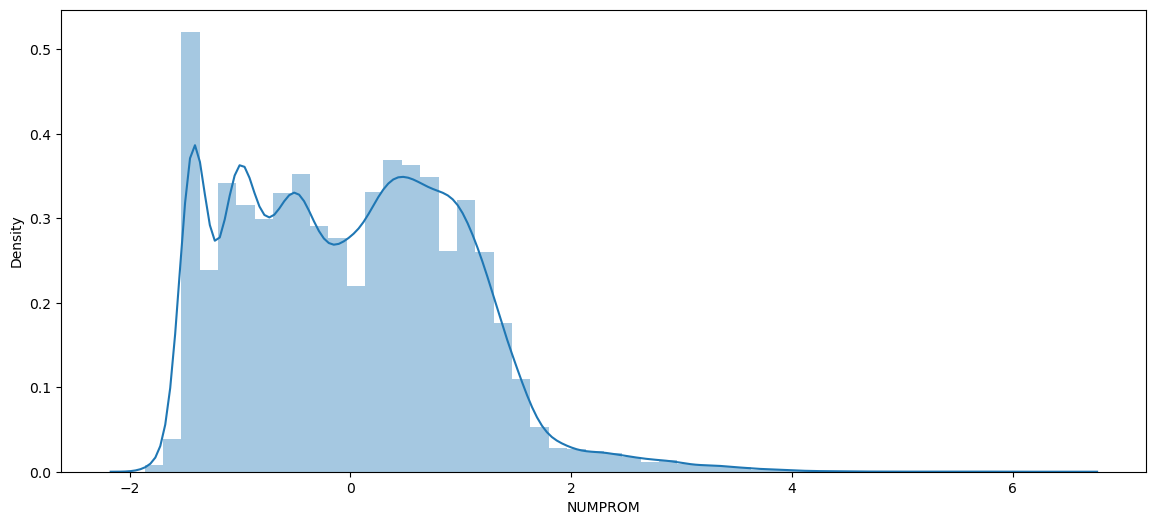

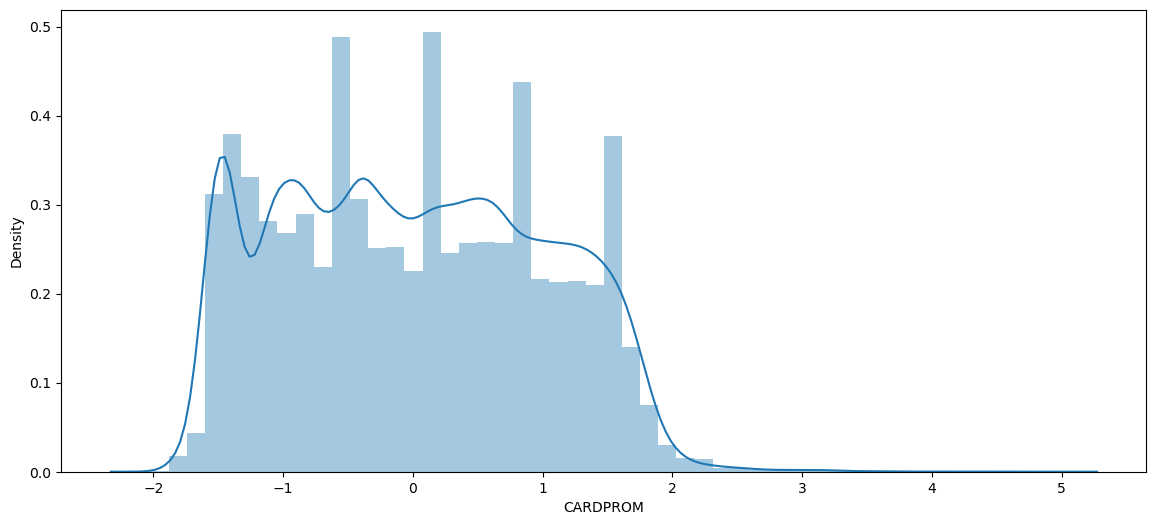

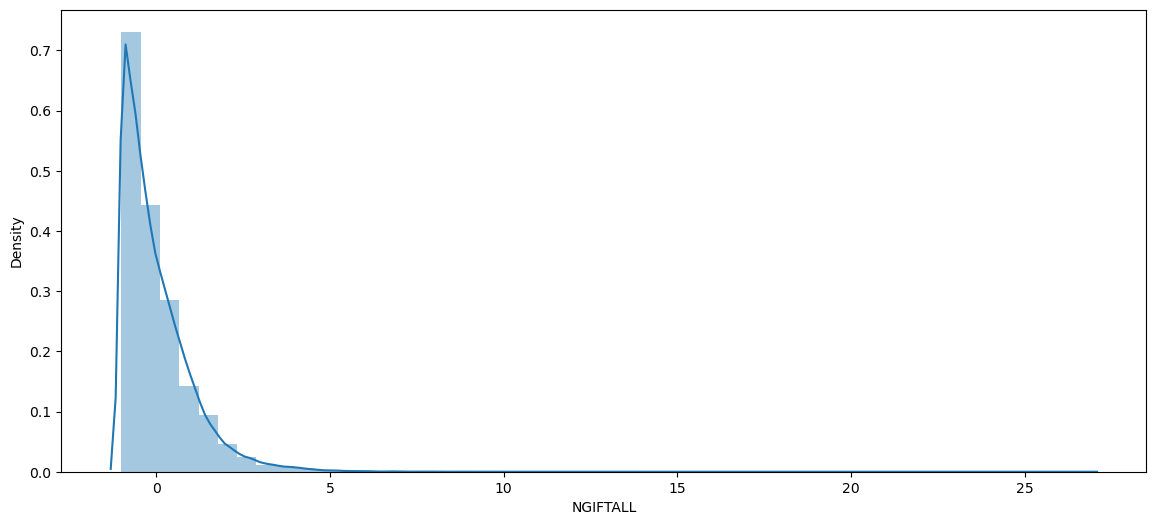

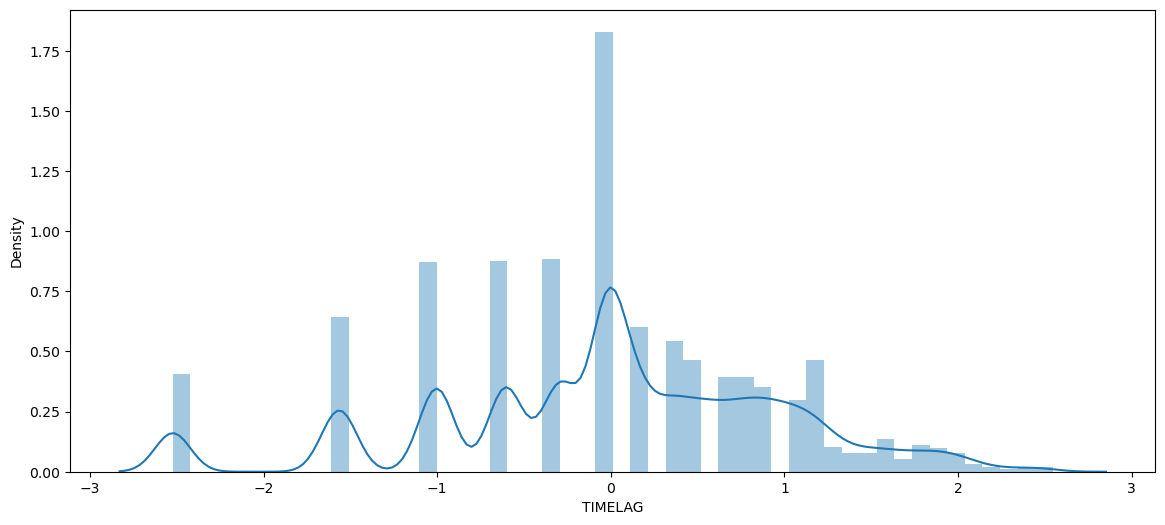

Transformation


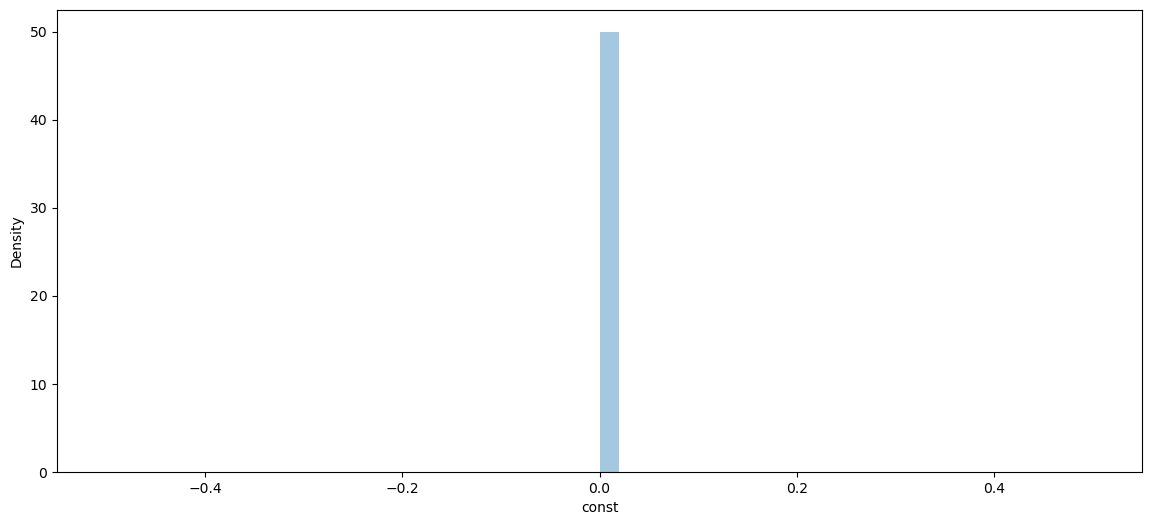

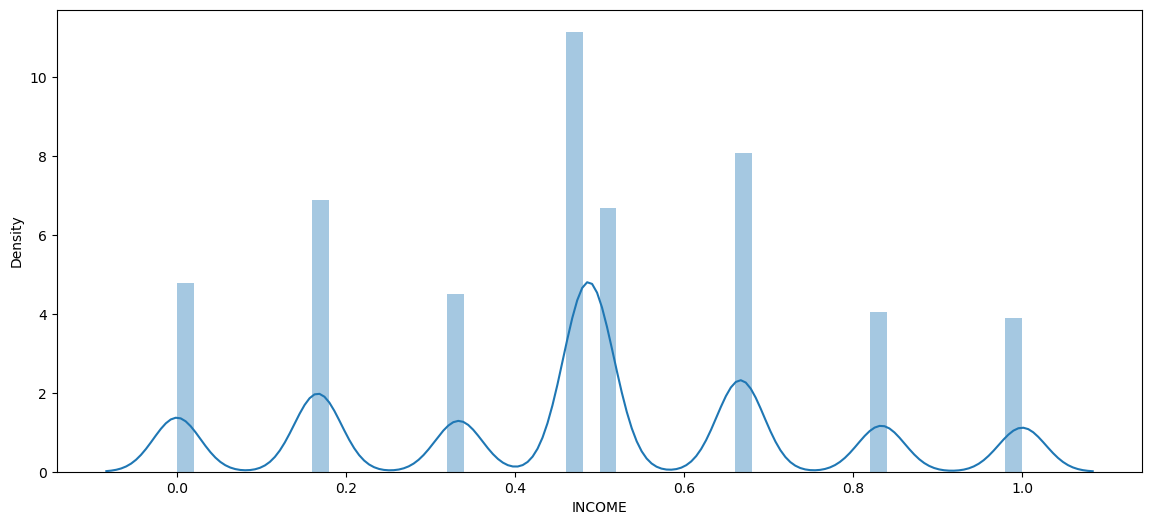

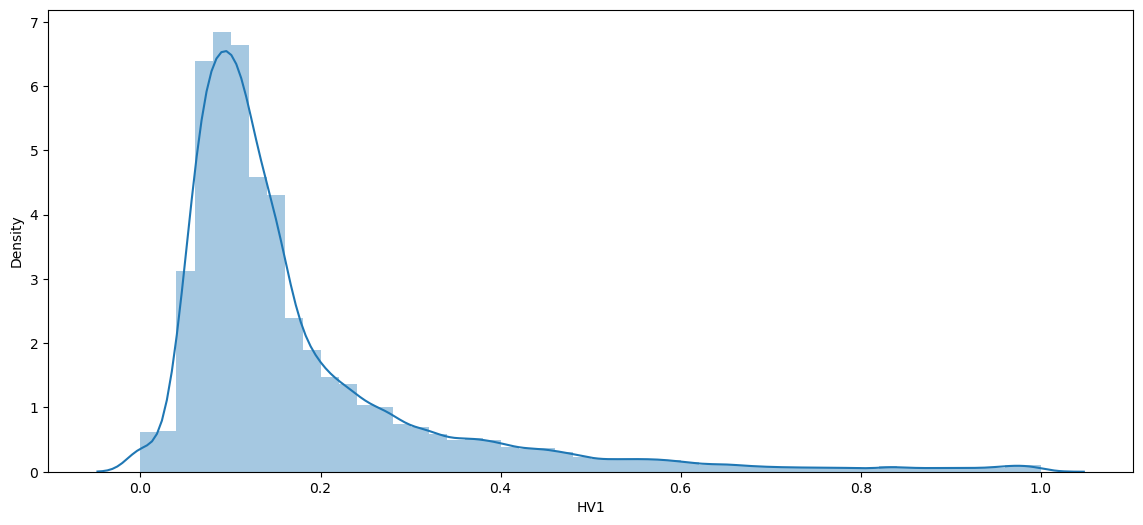

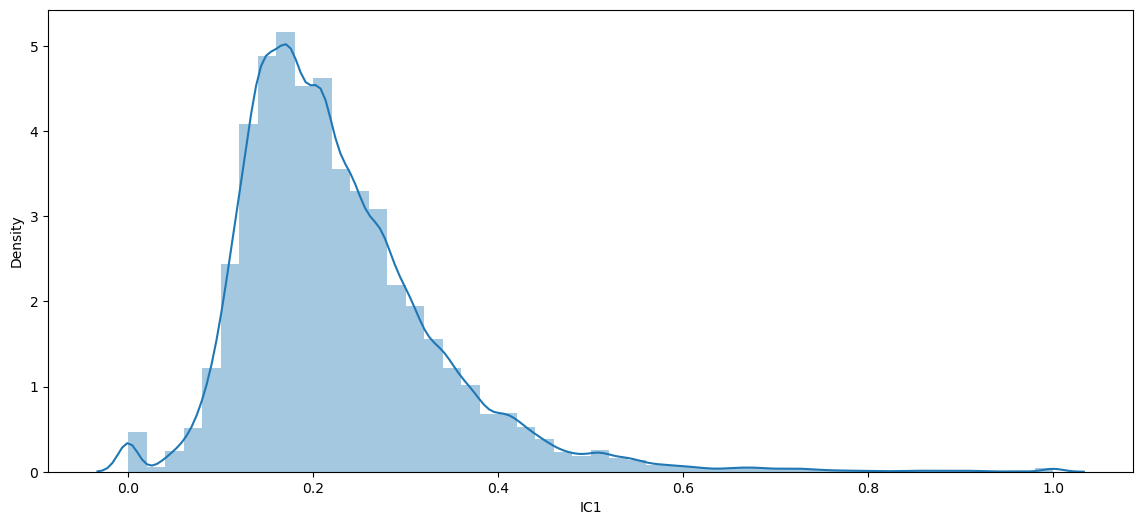

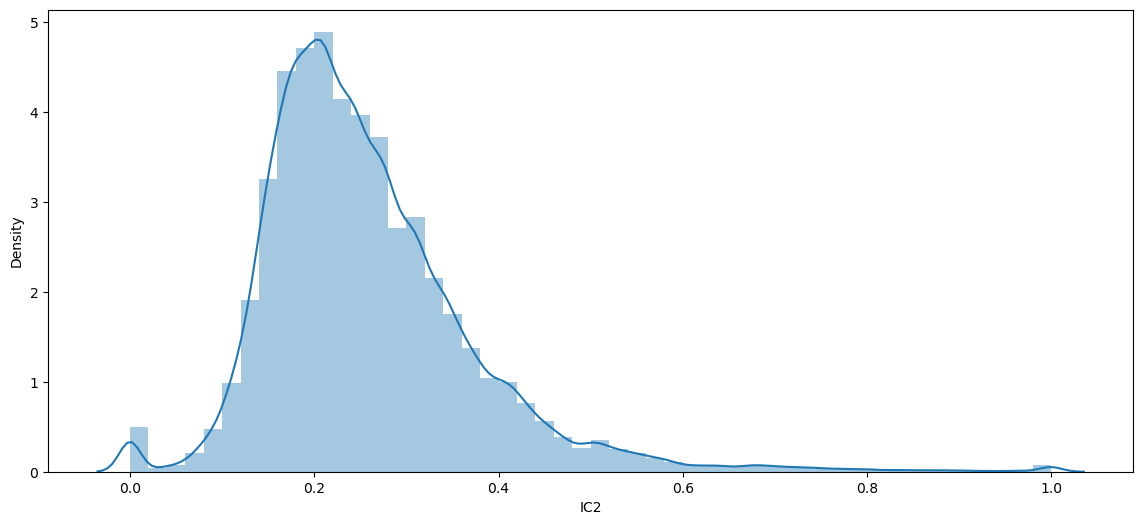

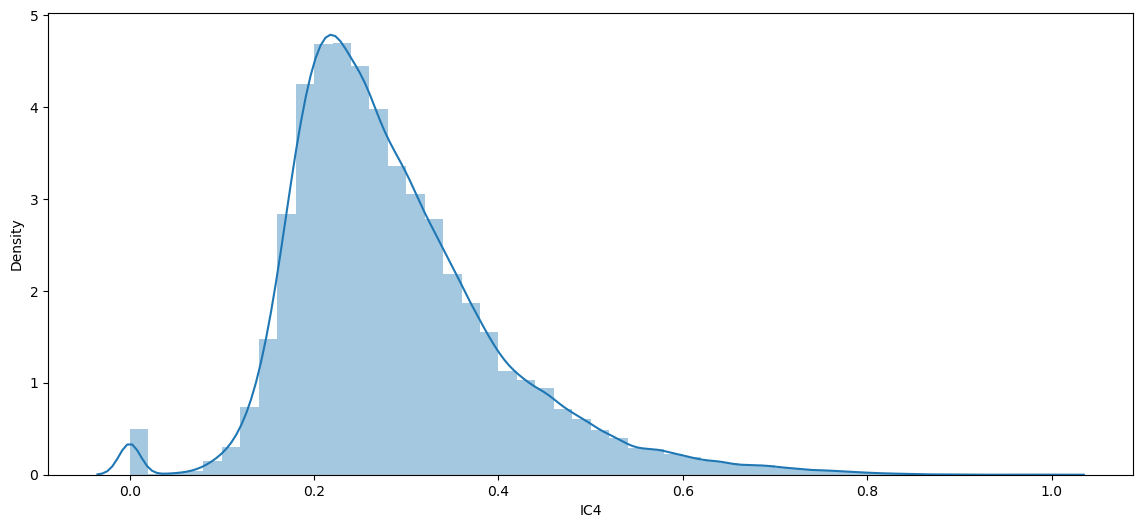

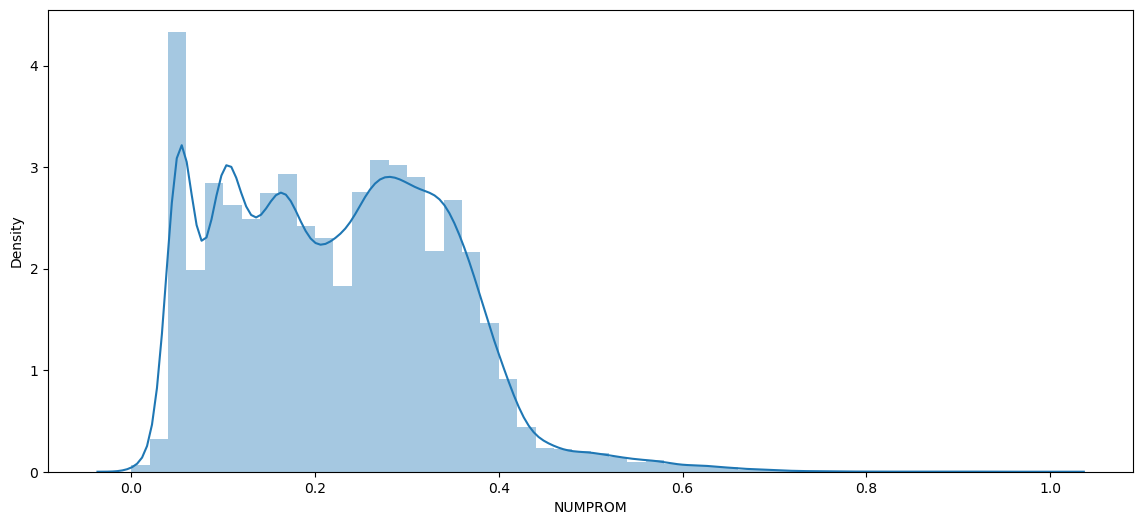

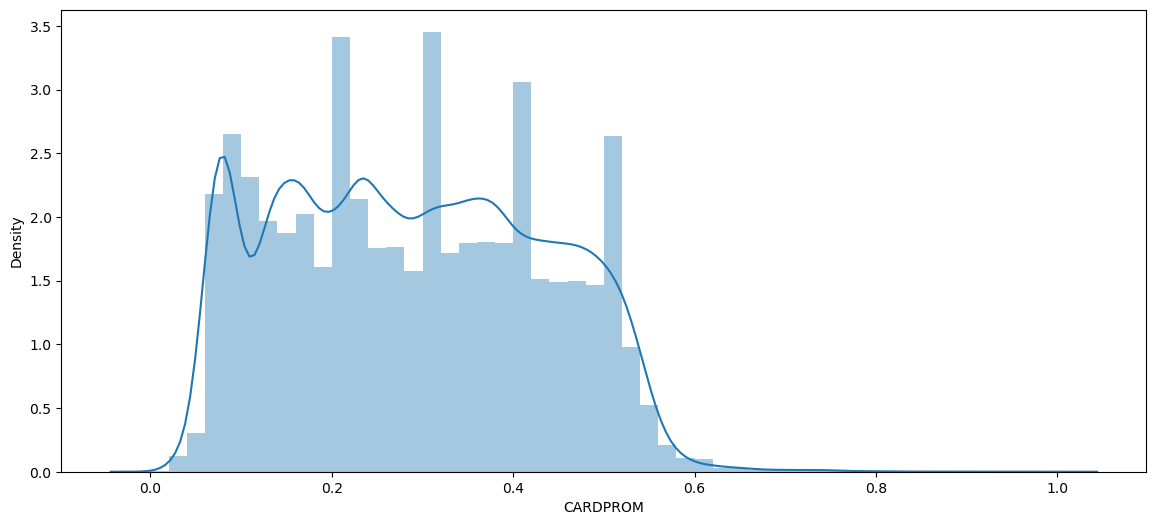

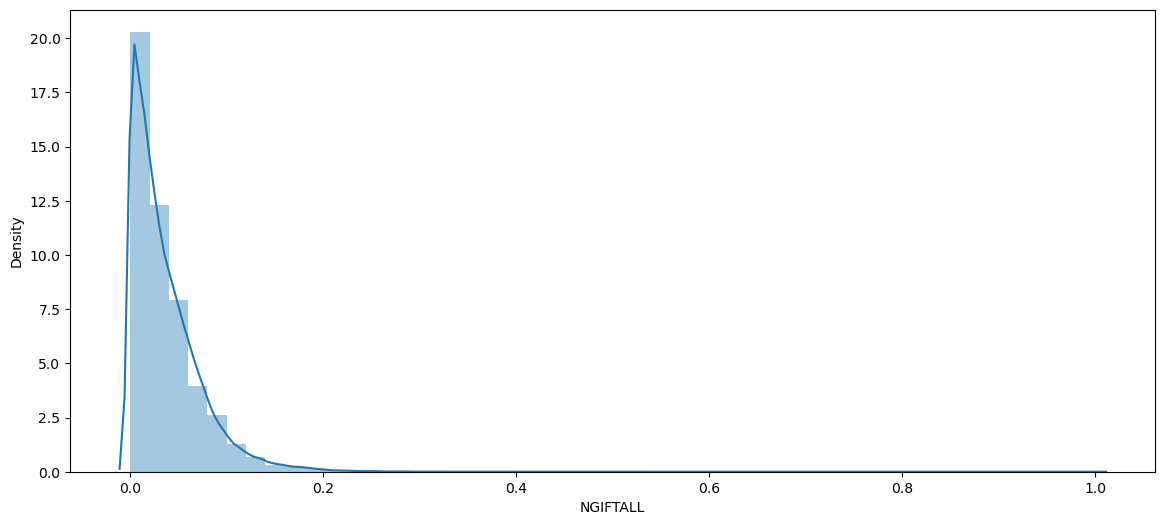

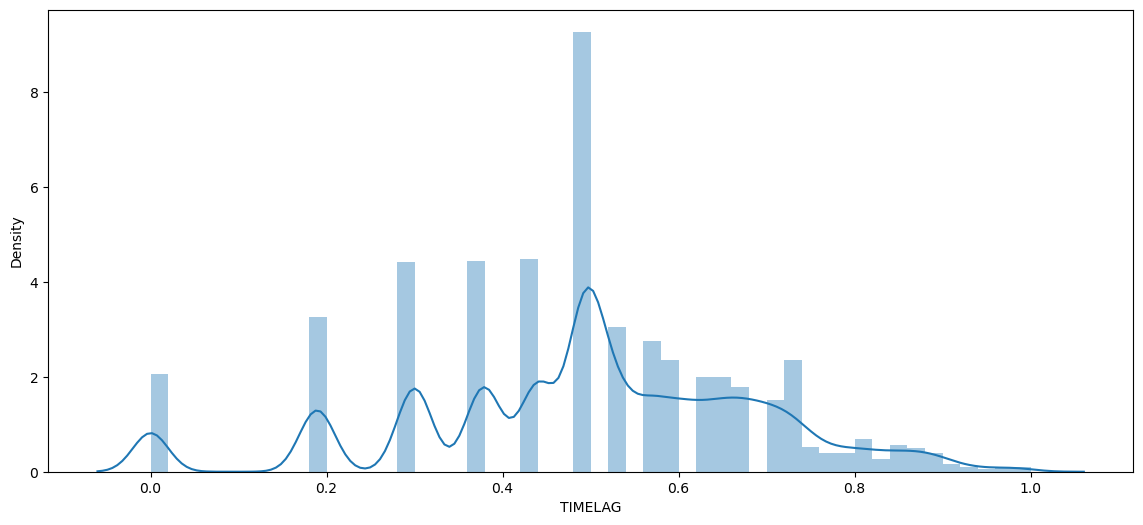

In [86]:
# Activity 4.3

for column in numerical:
    plt.figure(figsize = (14,6))
    sns.distplot(numerical[column])
plt.show()

scaled_dfs = [Normalizer().fit_transform(numerical), StandardScaler().fit_transform(numerical), MinMaxScaler().fit_transform(numerical)]

for scaled in scaled_dfs:
    new_df = pd.DataFrame(scaled)
    new_df.columns = numerical.columns
    print("Transformation")
    for column in new_df:
        plt.figure(figsize = (14,6))
        sns.distplot(new_df[column])
    plt.show()

In [87]:
# Cleaning categorical column DOMAIN

vals_domain = pd.DataFrame(data['DOMAIN'].value_counts())
vals_domain = vals_domain.reset_index()
vals_domain.columns = ['domain', 'counts']
group_vals_domain_df = vals_domain[vals_domain['counts']<5000]
group_vals_domain = list(group_vals_domain_df['domain'])
group_vals_domain

['T1', 'R3', 'U1', 'U2', 'U3', ' ', 'T3', 'S3', 'U4', 'R1']

In [88]:
def clean_vals_domain(x):
    if x in group_vals_domain:
        return 'other'
    else:
        return x

data['DOMAIN'] = list(map(clean_vals_domain, data['DOMAIN']))

In [89]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data[['DOMAIN']])
encoded = encoder.transform(data[['DOMAIN']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
# Activity 4: 

def standardization(ls, mean = True , std = True):

    array = np.array(ls)
    if mean == True:
        mean = array.mean()
    if std == True:
        std = array.std()

    return (array - mean) / std, mean, std


def min_max(ls, minimum = True , maximum = True):

    array = np.array(ls)
    if minimum == True:
        minimum = array.min()
    if maximum == True:
        maximum = array.max()

    return (array - minimum) / (maximum - minimum), minimum, maximum

![](https://miro.medium.com/v2/resize:fit:1151/0*ItVKiyx2F3ZU8zV5)

El algoritmo KNN es un método de aprendizaje supervisado utilizado para clasificación y regresión. En la clasificación, se asigna una etiqueta a un nuevo punto de datos en función de las etiquetas de sus vecinos más cercanos. En la regresión, se predice un valor numérico basado en los valores de los vecinos más cercanos.

El nombre "k-Nearest Neighbors" proviene de la forma en que el algoritmo toma decisiones. Dado un conjunto de datos de entrenamiento etiquetados, el algoritmo KNN encuentra los k vecinos más cercanos al punto de datos de prueba en función de una medida de distancia, comúnmente la distancia euclidiana. Luego, utiliza las etiquetas de los vecinos para clasificar o predecir el valor del punto de datos de prueba.

El valor de k en KNN determina cuántos vecinos se tendrán en cuenta para tomar una decisión. Si k es pequeño, el modelo puede ser más sensible al ruido y puede resultar en una clasificación más inestable. Por otro lado, si k es grande, puede haber una mayor suavidad en la clasificación, pero también puede haber una pérdida de detalles finos.

Algunas consideraciones importantes sobre el algoritmo KNN son:

Normalización de características: Es común aplicar la normalización de características antes de utilizar KNN, ya que las diferencias de escala entre las características pueden afectar la medida de distancia y, por lo tanto, la clasificación.

Elección del valor de k: La elección del valor de k puede ser crucial y depende del problema específico. Se pueden realizar técnicas de validación cruzada o utilizar medidas como la precisión o el error de clasificación para encontrar un valor óptimo de k.

Eficiencia computacional: A medida que el tamaño del conjunto de entrenamiento crece, la búsqueda de los vecinos más cercanos puede volverse computacionalmente costosa. Se pueden emplear estructuras de datos especiales, como el árbol KD o el índice de vecinos más cercanos (k-d trees o k-d trees), para acelerar la búsqueda.

El algoritmo KNN es relativamente simple de entender e implementar, y puede ser efectivo en muchos casos. Sin embargo, su rendimiento puede verse afectado por datos ruidosos, características irrelevantes o desbalance de clases. Como con cualquier algoritmo de aprendizaje automático, es recomendable realizar una exploración y preprocesamiento adecuados de los datos antes de aplicar KNN.